In [1]:
#извлекаем данные из сохраненного файла
import pickle
with open('data.pickle', 'rb') as f:
    dict_abs_freq = pickle.load(f)
#dict_abs_freq - массив словарей абсолютной встречаемости слов в разных книгах

In [2]:
#Сделаем еще один словарь - встречаемость слов во всей серии книг

In [3]:
def sum_two_dicts(dict1, dict2):
    new_dict = {}
    all_keys = list(set(list(dict1.keys()) + list(dict2.keys())))
    for key in all_keys:
        if key in dict1.keys() and key in dict2.keys():
            new_dict[key] = dict1[key] + dict2[key]
        elif (key in dict1.keys()):
            new_dict[key] = dict1[key]
        else:
            new_dict[key] = dict2[key]
    return new_dict


In [4]:
dict_all_book = {}
for cur_dict in dict_abs_freq:
    dict_all_book = sum_two_dicts(dict_all_book, cur_dict)

In [5]:
# Добавим словарь встречаемости слов к словарям встречаемости слов в каждой отдельной книге
dict_abs_freq.append(dict_all_book)

In [6]:
#определяем количество слов для каждой книги
lens = []
for cur_dict in dict_abs_freq:
    cur_len = 0
    for (key, value) in cur_dict.items():
        cur_len += value
    lens.append(cur_len)

In [7]:
print("Количество слов")
for i in range(len(lens) - 1):
    print("Книга " + str(i + 1) + "  -  " + str(lens[i]))
print("Всего " + "  -  " + str(lens[7]))

Количество слов
Книга 1  -  83113
Книга 2  -  71217
Книга 3  -  85337
Книга 4  -  149724
Книга 5  -  210942
Книга 6  -  148428
Книга 7  -  167783
Всего   -  916544


In [ ]:
Книги разной длины, поэтому важно не только,сколько раз слово встречается в книге(абсолютная встречаемость),
но и соотношение встречаемости слова к общему количеству слов(относительная встречаемость).
Будем хранить в словаре в качестве значения для каждого слова - кортеж, состоящий из абсолютной и относительной встречаемости

In [8]:
itog_dict = []
for i in range(len(dict_abs_freq)):
    new_dict = {}
    cur_dict = dict_abs_freq[i]
    cur_len = lens[i]
    for (key, value) in cur_dict.items():
        new_dict[key] = (value, value / cur_len)
    itog_dict.append(new_dict)

In [10]:
itog_dict[0] #словарь для первой книги

{'неуклюжий': (4, 4.812724844488829e-05),
 'причина': (5, 6.0159060556110356e-05),
 'юность': (1, 1.2031812111222072e-05),
 'заталкивать': (1, 1.2031812111222072e-05),
 'передумать': (4, 4.812724844488829e-05),
 'набрать': (6, 7.219087266733242e-05),
 'оциля': (1, 1.2031812111222072e-05),
 'сверхсекретный': (2, 2.4063624222444144e-05),
 'растерянно': (2, 2.4063624222444144e-05),
 'проскользнуть': (1, 1.2031812111222072e-05),
 'послушать': (6, 7.219087266733242e-05),
 'немой': (30, 0.0003609543633366621),
 'чепуха': (3, 3.609543633366621e-05),
 'ледяной': (8, 9.625449688977657e-05),
 'превеликий': (1, 1.2031812111222072e-05),
 'остановиться': (26, 0.00031282711489177383),
 'безостановочно': (3, 3.609543633366621e-05),
 'противостоять': (2, 2.4063624222444144e-05),
 'пончик': (3, 3.609543633366621e-05),
 'её': (1, 1.2031812111222072e-05),
 'псиный-то': (1, 1.2031812111222072e-05),
 'подгореть': (2, 2.4063624222444144e-05),
 'после': (62, 0.0007459723508957684),
 'мантия-невидимка': (11, 

In [12]:
Напишем функцию для печати отсортированных словарей встречаемости

SyntaxError: invalid syntax (<ipython-input-12-00258288756a>, line 1)

In [11]:
def fun(x): # вспомогательная функция для сортировки
    return -x[1][0], x[0]
# функция для печати отсортированных словарей встречаемости
def print_sorted(cur_dict, is_rel = False, min_abs_freq = 0, min_rel_freq = 0, print_all = False):
# по умолчанию условие ставится на абсолютную встречаемость слова, а не на относительную
# min_abs_freq - минимальная абсолютная встречаемость
# min_rel_freq - минимальная относительная встречаемость
    if (not is_rel): # смотрим на абсолютную встречаемость
        for (key, value) in sorted(cur_dict.items(), key = fun):
            if (value[0] >= min_abs_freq):
                if (print_all):
                    print(key, value[0], "%.4f" %value[1])
                else:
                    print(key, value[0])
    else:
        for (key, value) in sorted(cur_dict.items(), key = fun):
            if (value[1] >= min_rel_freq):
                if (print_all):
                    print(key, value[0], "%.4f" %value[1])
                else:
                    print(key, "%.4f" %value[1])

In [12]:
# посмотрим, какие слова встречаются с частотой не менее 1000 слов на книгу

for i in range(len(itog_dict) - 1):
    print("Книга " + str(i + 1) + "\n")
    print_sorted(itog_dict[i], min_abs_freq = 1000)
    print("----------------------")

Книга 1

он 2753
и 2672
в 2098
не 1806
что 1701
гарри 1646
на 1321
быть 1234
я 1094
----------------------
Книга 2

и 2161
в 1881
он 1786
гарри 1589
не 1408
на 1312
----------------------
Книга 3

и 2761
он 2288
в 2232
гарри 1919
не 1755
на 1586
что 1165
с 1124
я 1076
----------------------
Книга 4

и 5094
он 4141
в 3785
гарри 2962
не 2878
на 2788
с 2110
что 2080
я 1763
быть 1564
весь 1227
они 1209
это 1166
как 1121
она 1120
ты 1057
к 1000
----------------------
Книга 5

он 6639
и 6557
в 4830
не 4323
гарри 3899
на 3834
что 3496
с 2874
я 2483
быть 2330
она 2233
сказать 2011
они 1836
ты 1762
это 1731
как 1500
к 1384
весь 1380
но 1334
у 1299
рон 1237
гермиона 1230
а 1116
вы 1086
за 1027
по 1021
----------------------
Книга 6

он 4439
и 4423
в 3641
не 3316
гарри 2910
что 2485
на 2307
я 2293
с 2129
быть 1550
это 1334
ты 1254
сказать 1208
она 1186
как 1154
весь 1055
----------------------
Книга 7

и 5467
он 5235
в 4076
гарри 3474
не 3406
на 2838
что 2640
я 2127
с 2073
быть 1687
она 1663
они 

In [13]:
# посмотрим, какие слова встречаются с частотой не менее 1 %

for i in range(len(itog_dict) - 1):
    print("Книга " + str(i + 1) + "\n")
    print_sorted(itog_dict[i], is_rel = True, min_rel_freq = 0.01)
    print("----------------------")
print("Все книги " + "\n")
print_sorted(itog_dict[7], is_rel = True, min_rel_freq = 0.01)

Книга 1

он 0.0331
и 0.0321
в 0.0252
не 0.0217
что 0.0205
гарри 0.0198
на 0.0159
быть 0.0148
я 0.0132
с 0.0116
они 0.0104
----------------------
Книга 2

и 0.0303
в 0.0264
он 0.0251
гарри 0.0223
не 0.0198
на 0.0184
с 0.0134
что 0.0125
я 0.0118
быть 0.0101
----------------------
Книга 3

и 0.0324
он 0.0268
в 0.0262
гарри 0.0225
не 0.0206
на 0.0186
что 0.0137
с 0.0132
я 0.0126
быть 0.0106
----------------------
Книга 4

и 0.0340
он 0.0277
в 0.0253
гарри 0.0198
не 0.0192
на 0.0186
с 0.0141
что 0.0139
я 0.0118
быть 0.0104
----------------------
Книга 5

он 0.0315
и 0.0311
в 0.0229
не 0.0205
гарри 0.0185
на 0.0182
что 0.0166
с 0.0136
я 0.0118
быть 0.0110
она 0.0106
----------------------
Книга 6

он 0.0299
и 0.0298
в 0.0245
не 0.0223
гарри 0.0196
что 0.0167
на 0.0155
я 0.0154
с 0.0143
быть 0.0104
----------------------
Книга 7

и 0.0326
он 0.0312
в 0.0243
гарри 0.0207
не 0.0203
на 0.0169
что 0.0157
я 0.0127
с 0.0124
быть 0.0101
----------------------
Все книги 

и 0.0318
он 0.0298
в 0.0246


In [22]:
Среди слов с частотой больше 1% есть только одно значимое слово - Гарри

True

In [ ]:
Будем рассматривать книги по очереди, удалять в них редкие слова и короткие слова
(кроме частых и коротких слов - Рон, Том и тп).
Короткие слова редко являются значимыми(обычно это слова он, и, в, не)
Имена нужно начинать с заглавной буквы
Морфологический анализатор некоторые слова неверно ставит в начальную форму:
снегга - Снегг, флера - Флер, уизлить - Уизли, малфа/малфой - Малфой и тп
Будем их заменять
Получим short_dict - словарь без редких слов, без коротких слов и без глаголов, союзов, предлогов, частиц, междометий

In [14]:
#подключаем морфологический анализатор
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
Выделим имена, которые морфологический анализатор неправильно перевел в начальные формы

In [14]:
#не нужно выполнять каждый раз
#names_pers_1 = ['арабелла', 'винки', 'крам', 'стебель', 'когтевран', 'трелони', 'уолден', 'флетчер', 'антонин', 'грин-де-вальд', 'макнейр', 'петтигрю', 'добби', 'драко', 'наземникус', 'том', 'сириус', 'северус', 'пий', 'долиш', 'руфус', 'рубеус', 'сохатый,', 'бэгмен', 'дамблдор', 'люциус', 'лунатик', 'кандида', 'захария', 'фенрир', 'гарри', 'сивый', 'миртл', 'флёр', 'винсент', 'амбридж', 'джинни', 'лили', 'плакса', 'рон', 'питер', 'дедалус', 'толстоватый', 'диггори', 'филч', 'крауч', 'регулус', 'годрик', 'ксенофилиус', 'мракс', 'квиррелл', 'букля', 'грохх', 'скримджер', 'билл', 'молли', 'помфри', 'шанпайк', 'гораций', 'салазар', 'сивилла', 'смит', 'фред', 'беллатриса', 'аластор', 'фигг', 'грюм', 'робардс', 'макгонагалл', 'долохов', 'чжоу', 'бартемий', 'флитвик', 'лестрейндж', 'стэн', 'дурсль', 'диггл', 'хвост', 'делакур', 'каркаров', 'полумна', 'рита', 'пивз', 'джеймс', 'габриель', 'уизли', 'чанг', 'слизерин', 'олливандер', 'бродяга,', 'кикимер', 'малфой', 'долгопупс', 'джордж', 'слизнорт', 'нарцисса', 'дадли', 'пуффендуй', 'гавейн', 'минерва', 'виктор', 'крэбб', 'вернон', 'геллерт', 'тонкс', 'аргус', 'бруствер', 'снегг', 'корнелиус', 'фоукс', 'римус', 'артур', 'максим', 'долорес', 'златопуст', 'олимпия', 'рудольфус', 'перси', 'люпин', 'флоренц', 'игорь', 'хагрид', 'гойл', 'чарли', 'поттер', 'реддл', 'грейнджер', 'гриффиндор', 'седрик', 'крюкохват', 'волан-де-морт', 'скитер', 'альбус', 'гермиона', 'филиус', 'дурсли', 'нимфадора', 'короста', 'диппет', 'армандо', 'блэк', 'фадж', 'невилл', 'грегори', 'локонс', 'лавгуд', 'пенелопа', 'помона', 'кингсли']

In [13]:
#не нужно выполнять каждый раз
#cur_dict = itog_dict[7] #смотрим слова во всей серии
#for key1 in cur_dict.keys():
#        for key2 in names_pers_1:
#                if key1 != key2:
#                    t = 1
#                    while key1[:t] == key2[:t] and len(key1) > t and len(key2) > t:
#                        t += 1
#                    if (len(key1) - t <= 4 and len(key2) - t <= 4) and t >= 5:
#                        print(key1, key2)

In [15]:
#обработка слова, у которого анализатор нашел две начальные формы
#альбусы, альбуса - альбус, малфой, малфа - малфой
def insert_amb_words(ar, len_book, old_dict, new_dict):
    new_key = ar[0]
    count = 0
    for key1 in ar:
        if (key1 in old_dict.keys()):
            count += old_dict[key1][0]
    new_dict[new_key] = (count, count / len_book)
            
#функция убирает "плохие слова", оставляет редкие
def delete_bad_words(cur_dict, len_book, param_freq = 0.001):
    clean_dict = {}
    replace_names = [['реддл', 'реддло'], ['малфой', 'малфий', 'малфа'], ['шанпайк', 'шанпаёк', 'шанпайка'], \
                 ['грегори', 'грегор'], ['полумна', 'полумный', 'полумны'], ['минерва', 'минерв'], ['римус', 'римуса'], \
                 ['люциус', 'люциуса'], ['альбус', 'альбусы', 'альбуса'], ['бэгмен', 'бэгменом', 'бэгмена'], ['вернон', 'верноном', 'вернона'], \
                 ['скримджер', 'скримджером'],  ['фоукс', 'фоукса'], ['олимпия', 'олимпий'], \
                 ['петтигрю', 'петтигрить'], ['кикимер', 'кикимера'], ['трелони', 'трелонь'], ['клювокрыл', 'клювокрыло'],\
                 ['невилл', 'невилла'], ['северус', 'северусый', 'северуса'], ['флер', 'флера', 'флёр', 'флёра'],\
                 ['скитер', 'скитереть'], ['кингсли', 'кингслить'], ['флитвик', 'флитвика'], ['пуффендуй', 'пуффендовать'],\
                 ['хагрид', 'хагридь'], ['миртл', 'миртлый'], ['крэбб', 'крэбба'], ['каркаров', 'каркаровый'], \
                 ['крауч', 'краучить', 'краучий'], ['джинни', 'джинна', 'джинний'], ['когтевран', 'когтеврать'], \
                 ['дамблдор', 'дамблдору', 'дамблдора'], ['захария', 'захарий'], ['златопуст','златопустой'], \
                 ['квиррелл', 'квиррелла'], ['лестрейндж', 'лестрейнджа'], ['уизли', 'уизлый', 'уизлить'], ['винки', 'винк'], \
                 ['дурсль', 'дурслем', 'дурсли', 'дурслить', 'дурслях'], ['снегг', 'снеггов', 'снегт', 'снегга', 'снегге'], ['крестраж', 'крестража']]
    replace_names_list = {'бэгмена', 'бэгмен', 'миртлый', 'уизли', 'квиррелла', 'олимпия', 'вернона', 'уизлить', 'когтеврать', 'фоукс', 'захарий', 'флера', 'флер', 'флёр', 'флёра', 'дурслем', 'альбусы', 'римус', 'римуса', 'альбуса', 'олимпий', 'джинна', 'трелони', 'полумный', 'грегори', 'шанпаёк', 'краучить', 'малфа', 'вернон', 'невилла', 'снегге', 'малфий', 'уизлый', 'кикимер', 'когтевран', 'люциуса', 'дамблдор', 'дурслить', 'миртл', 'шанпайка', 'лестрейндж', 'снегт', 'снегг', 'скримджером', 'невилл', 'скримджер', 'реддло', 'квиррелл', 'скитереть', 'дамблдора', 'кикимера', 'фоукса', 'реддл', 'каркаровый', 'пуффендуй', 'шанпайк', 'дурсль', 'дамблдору', 'северуса', 'северус', 'краучий', 'петтигрить', 'бэгменом', 'минерва', 'флитвик', 'минерв', 'кингслить', 'пуффендовать', 'альбус', 'хагрид', 'крэбб', 'люциус', 'полумна', 'лестрейнджа', 'флитвика', 'дурсли', 'трелонь', 'полумны', 'дурслях', 'джинний', 'верноном', 'снегга', 'петтигрю', 'малфой', 'снеггов', 'кингсли', 'хагридь', 'северусый', 'скитер', 'крэбба', 'джинни', 'каркаров', 'грегор', 'крауч', 'захария', 'крестраж', 'крестража', 'винк', 'винки', 'златопуст', 'златопустой', 'клювокрыл', 'клювокрыло'}
    for (key, value) in cur_dict.items():
        if not key in replace_names_list:
            tag = morph.parse(key)[0].tag
            if not (('INFN' in tag) or ('PREP' in tag) or ('CONJ' in tag) or ('PRCL' in tag) or ('INTJ' in tag) or ('NPRO' in tag)):
                clean_dict[key] = value
    for ar in replace_names:
        insert_amb_words(ar, len_book, cur_dict, clean_dict)
    return clean_dict

In [16]:
for i in range(len(itog_dict)):
    itog_dict[i] = delete_bad_words(itog_dict[i], lens[i])

In [17]:
def delete_rare_words(cur_dict, len_book, min_freq = 0.0005):
    new_dict = {}
    for (key, value) in cur_dict.items():
        rel_freq = value[1]
        if (rel_freq > min_freq and (len(key) >= 4 or key in ['том', 'рон', 'дин', 'ли', 'вуд', 'пий', 'тед', 'дож'])):
            new_dict[key] = value
    return new_dict

In [18]:
short_itog_dict = [] # массив со словарями встречаемости слов в разных книгах
for i in range(len(itog_dict)):
    t = delete_rare_words(itog_dict[i], lens[i], min_freq = 0.0005)
    short_itog_dict.append(t)

In [16]:
#Самые частые слова в разных книгах после "чистки" словарей
for i in range(len(short_itog_dict) - 1):
    print("Книга " + str(i + 1))
    print_sorted(short_itog_dict[i], print_all = True, is_rel = True)
    print("-------------------------")
print("Всего")
print_sorted(short_itog_dict[7], print_all = True, is_rel = True)
    

Книга 1
гарри 1646 0.0198
весь 701 0.0084
рон 512 0.0062
хагрид 421 0.0051
который 349 0.0042
мочь 344 0.0041
гермиона 329 0.0040
свой 329 0.0040
один 284 0.0034
профессор 248 0.0030
такой 246 0.0030
этот 232 0.0028
рука 200 0.0024
снегг 198 0.0024
дамблдор 185 0.0022
самый 171 0.0021
очень 166 0.0020
дадли 154 0.0019
дурсль 151 0.0018
дядя 148 0.0018
малфой 143 0.0017
глаз 139 0.0017
большой 138 0.0017
дверь 137 0.0016
вернон 136 0.0016
школа 135 0.0016
невилл 132 0.0016
квиррелл 128 0.0015
поттер 128 0.0015
голос 126 0.0015
потому 126 0.0015
лицо 122 0.0015
голова 116 0.0014
макгонагалл 115 0.0014
мистер 112 0.0013
надо 110 0.0013
хороший 110 0.0013
здесь 108 0.0013
время 106 0.0013
метла 106 0.0013
человек 106 0.0013
теперь 105 0.0013
несколько 104 0.0013
никогда 94 0.0011
день 93 0.0011
должный 93 0.0011
камень 93 0.0011
сейчас 93 0.0011
другой 91 0.0011
друг 90 0.0011
письмо 88 0.0011
потом 88 0.0011
палочка 86 0.0010
снова 86 0.0010
стол 85 0.0010
твой 85 0.0010
сторона 84 0.0010

министерство 104 0.0007
несколько 104 0.0007
урок 104 0.0007
минута 103 0.0007
пока 103 0.0007
можно 102 0.0007
чемпион 102 0.0007
яйцо 99 0.0007
всего 98 0.0007
никогда 98 0.0007
каркар 97 0.0006
палец 97 0.0006
золотой 96 0.0006
земля 95 0.0006
школа 95 0.0006
волос 94 0.0006
прямо 94 0.0006
комната 92 0.0006
опять 91 0.0006
флер 91 0.0006
какой-то 90 0.0006
письмо 90 0.0006
потом 90 0.0006
дракон 89 0.0006
макгонагалл 88 0.0006
хозяин 88 0.0006
лестница 86 0.0006
маленький 86 0.0006
пожиратель 86 0.0006
максим 85 0.0006
почему 84 0.0006
вместе 83 0.0006
почти 82 0.0005
огромный 81 0.0005
длинный 80 0.0005
пора 80 0.0005
рита 80 0.0005
сова 80 0.0005
тогда 80 0.0005
воздух 79 0.0005
вокруг 79 0.0005
дядя 78 0.0005
стоялый 78 0.0005
невилл 77 0.0005
шрам 77 0.0005
заклинание 76 0.0005
фадж 76 0.0005
свет 75 0.0005
сразу 75 0.0005
-------------------------
Книга 5
гарри 3899 0.0185
весь 1380 0.0065
рон 1237 0.0059
гермиона 1230 0.0058
который 804 0.0038
мочь 793 0.0038
свой 701 0.0033


потому 591 0.0006
каждый 582 0.0006
министерство 578 0.0006
почти 578 0.0006
можно 558 0.0006
урок 557 0.0006
окно 556 0.0006
тогда 553 0.0006
воздух 548 0.0006
свет 548 0.0006
дядя 542 0.0006
хорошо 542 0.0006
волос 532 0.0006
плечо 531 0.0006
пожиратель 520 0.0006
коридор 514 0.0006
наконец 509 0.0006
опять 506 0.0006
палец 506 0.0006
маленький 503 0.0005
отец 493 0.0005
книга 489 0.0005
заклятие 487 0.0005
стоялый 485 0.0005
прямо 475 0.0005
огромный 472 0.0005
грюм 469 0.0005
жизнь 469 0.0005
сила 469 0.0005
сразу 469 0.0005
кабинет 467 0.0005
вернон 465 0.0005
какой-то 463 0.0005
метла 462 0.0005


In [ ]:
Вручную выделяем самые частые имена, волшебные и обычные предметы
Потом смотрим для этих слов частоты, строим диаграммы

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Диаграммы встречаемости одного персонажа в разных книгах

In [20]:
names_pers = ['гарри', 'поттер', 'гермиона', 'рон', 'джинни', 'фред', 'джордж', 'билл', 'перси', 'уизли', 'невилл', 'полумна', 'седрик', 'диггори', 'чжоу', 'джастин', 'колин', 'крам', 'флер', 'дамблдор', 'альбус', 'снегг', 'грюм', 'златопуст', 'локонс', 'люпин', 'макгонагалл', 'хагрид', 'квиррелл', 'трелони', 'слизнорт', 'сириус', 'блэк', 'амбридж', 'волан-де-морт', 'реддл', 'беллатриса', 'драко', 'малфой', 'питер', 'петтигрю', 'бэгмен', 'дурсль', 'вернон', 'дадли', 'петунья', 'мардж', 'винки', 'добби', 'живоглот', 'кикимер', 'клювокрыл', 'клык',  'короста',  'крауч', 'крюкохват', 'ксенофилиус', 'максим', 'миртл', 'фадж', 'стэн', 'скримджер', 'рита', 'азкабан', 'гриффиндор', 'слизерин', 'хогвартс', 'хогсмид']
pers = pd.DataFrame(columns = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for key in names_pers:
    ar = []
    for i in range(len(itog_dict)):
        if (key in itog_dict[i].keys()):
            ar.append(itog_dict[i][key][1]) # нас интересуют относительные величины
        else:
            ar.append(0.0)
    pers.loc[key] = ar

In [21]:
pers

,1,2,3,4,5,6,7,всего
гарри,0.019804,0.022312,0.022487,0.019783,0.018484,0.019605,0.020705,0.020074
поттер,0.001540,0.001573,0.001254,0.001576,0.001318,0.000654,0.001413,0.001304
гермиона,0.003958,0.004241,0.007242,0.005617,0.005831,0.004757,0.007790,0.005819
рон,0.006160,0.009141,0.008355,0.006485,0.005864,0.006050,0.007081,0.006732
джинни,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
фред,0.000457,0.001165,0.000867,0.001142,0.001489,0.000539,0.000548,0.000930
джордж,0.000385,0.001067,0.000691,0.000982,0.001289,0.000418,0.000471,0.000793
билл,0.000048,0.000070,0.000059,0.000461,0.000147,0.000397,0.000733,0.000323
перси,0.000481,0.000969,0.000785,0.000768,0.000284,0.000141,0.000226,0.000447
уизли,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


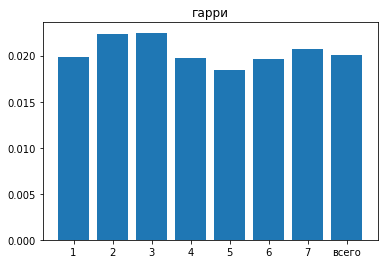

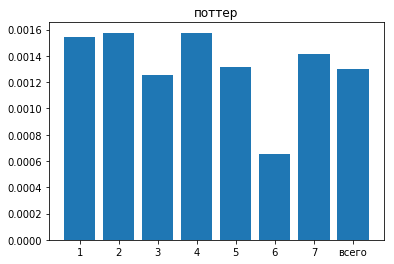

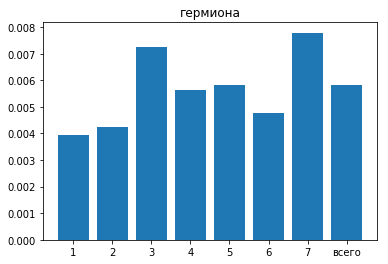

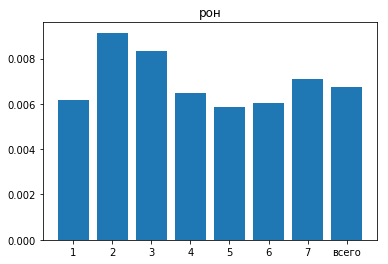

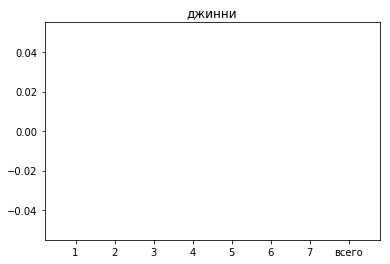

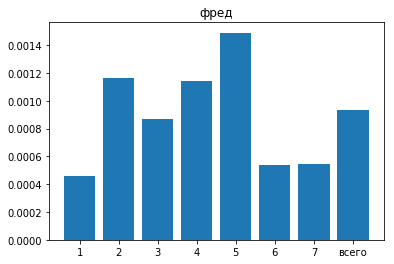

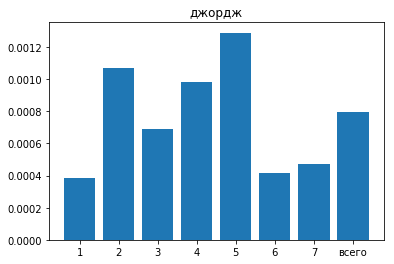

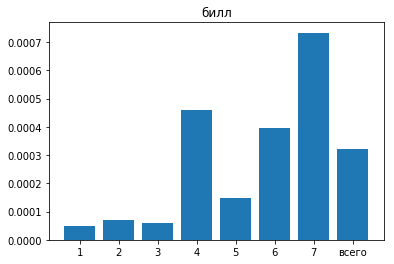

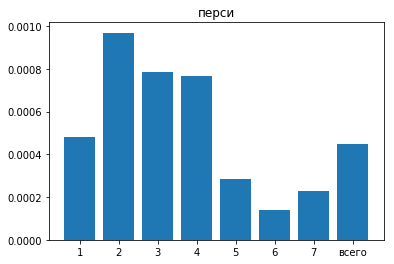

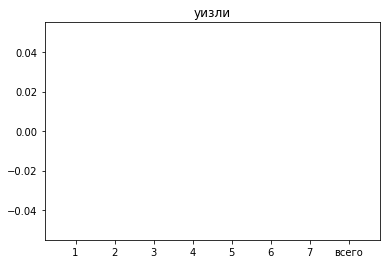

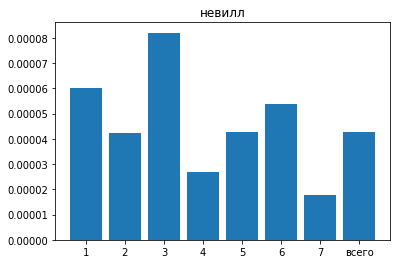

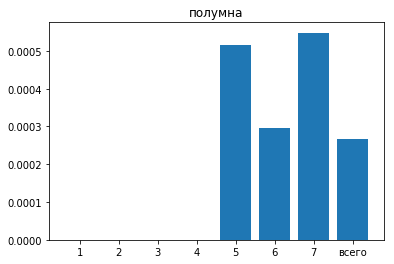

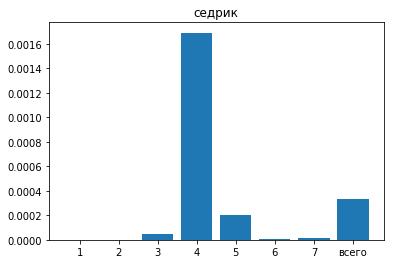

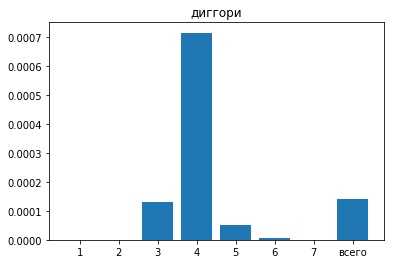

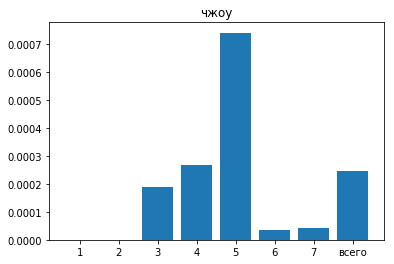

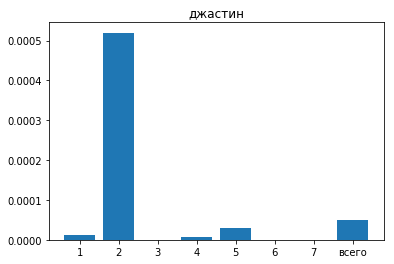

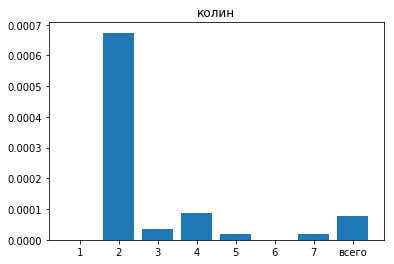

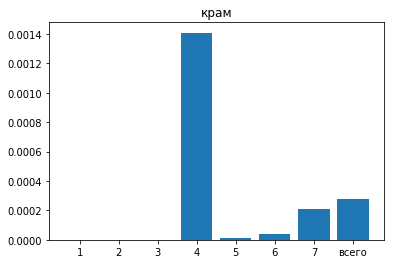

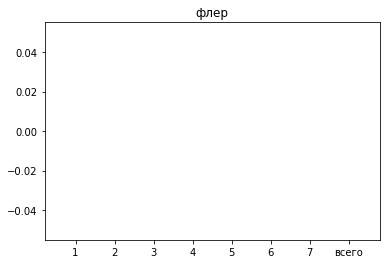

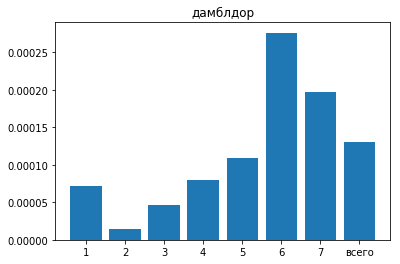

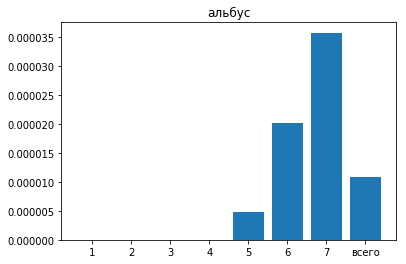

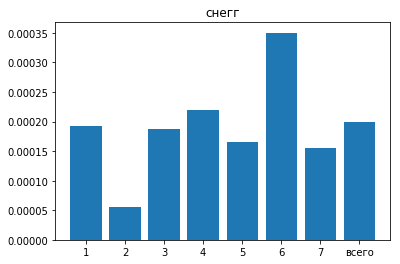

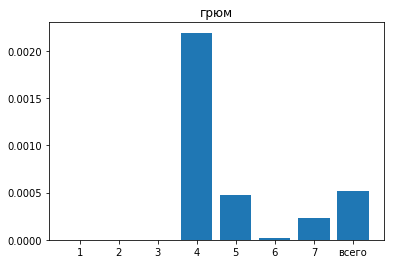

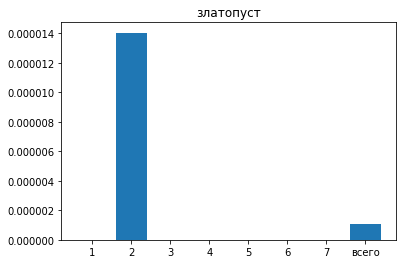

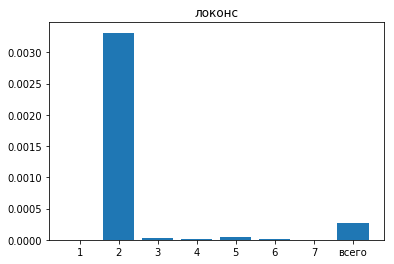

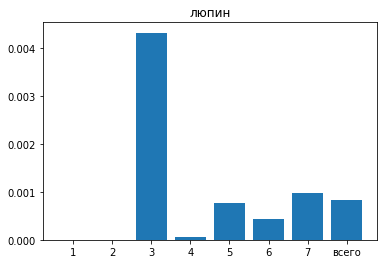

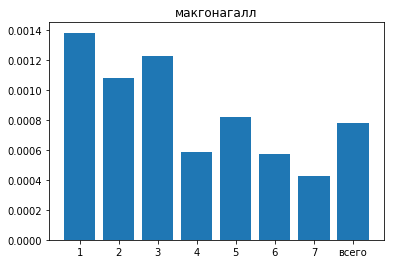

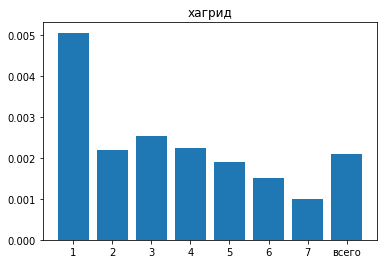

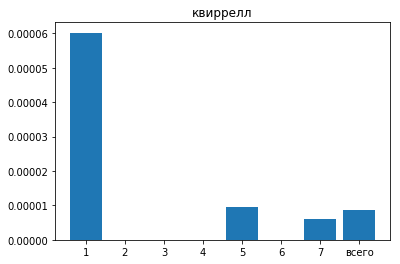

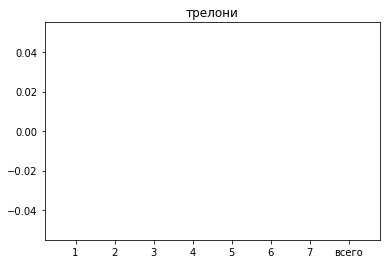

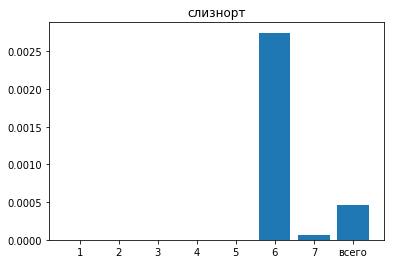

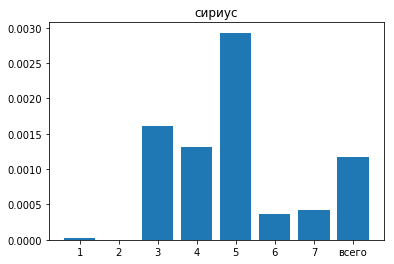

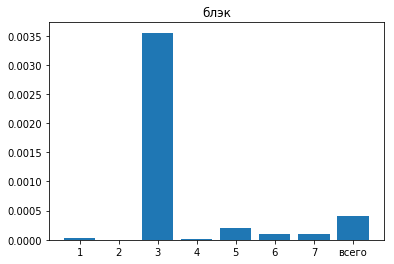

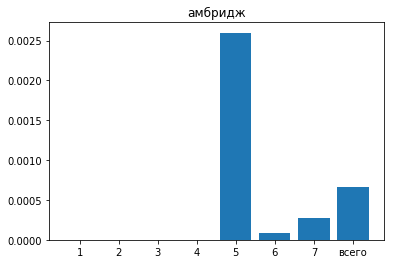

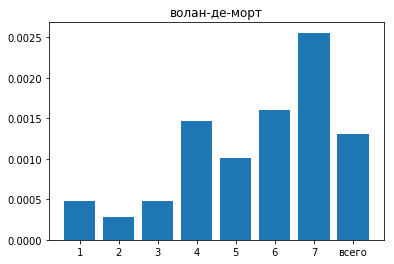

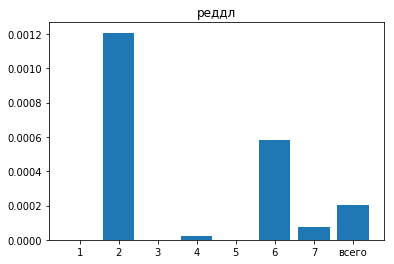

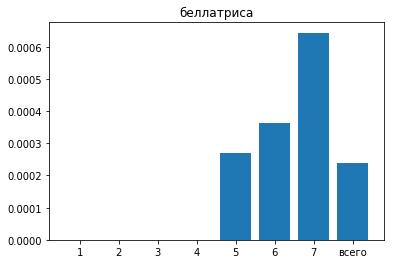

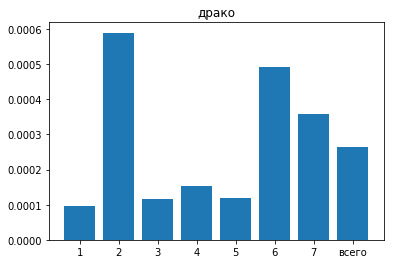

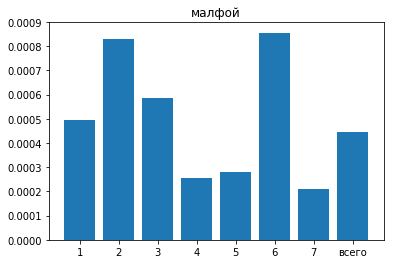

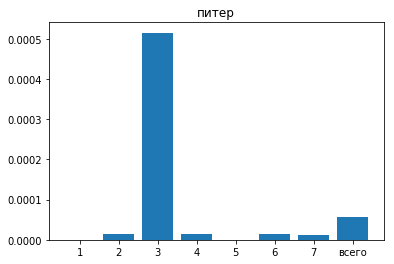

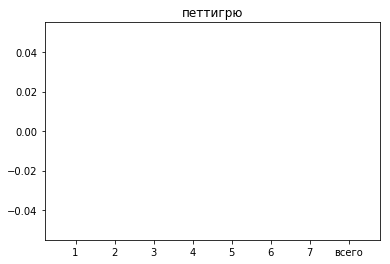

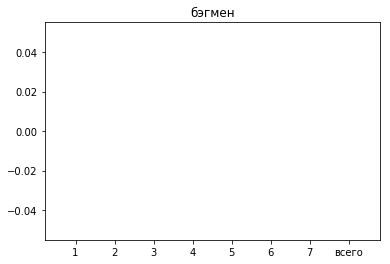

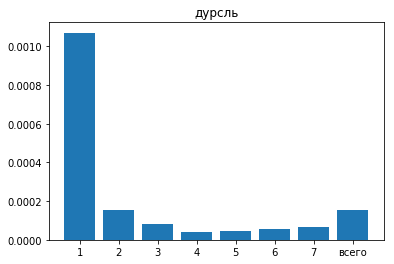

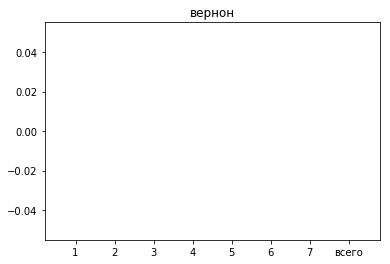

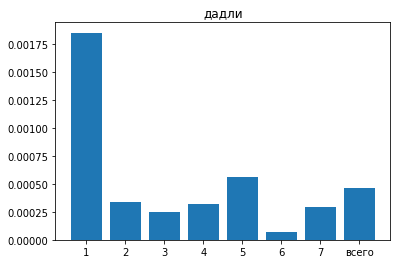

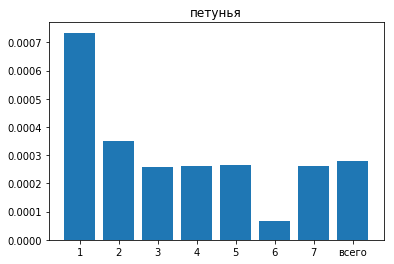

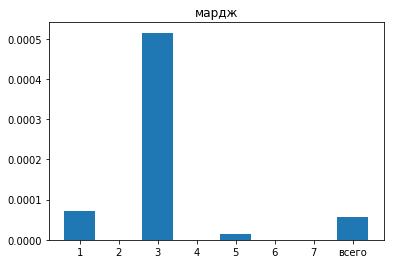

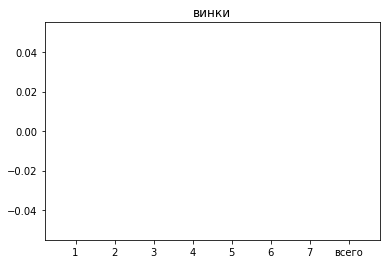

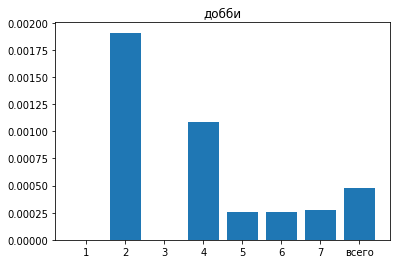

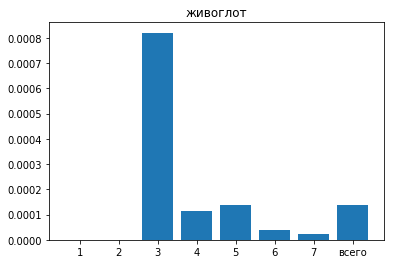

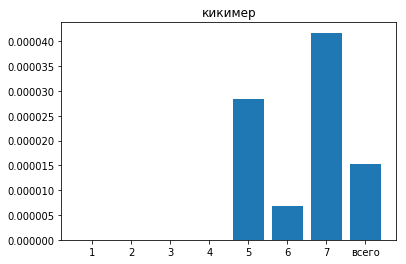

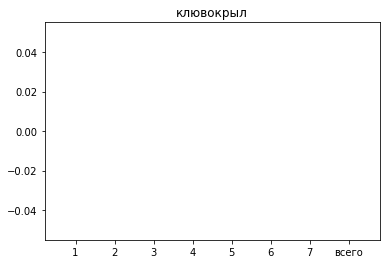

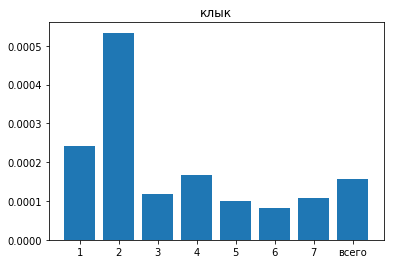

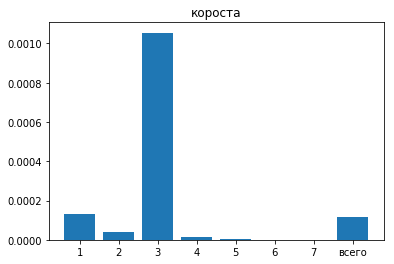

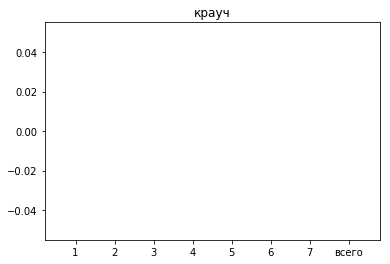

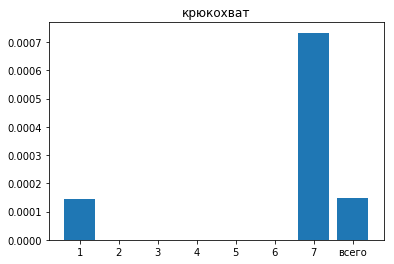

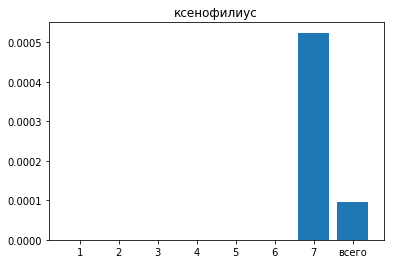

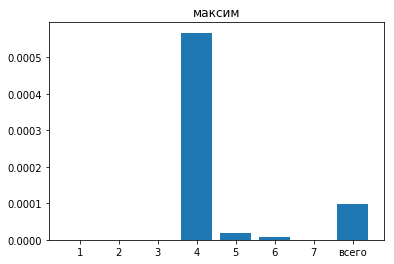

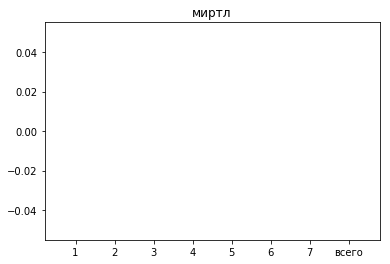

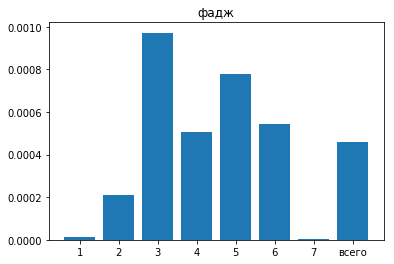

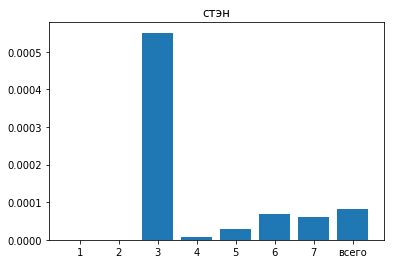

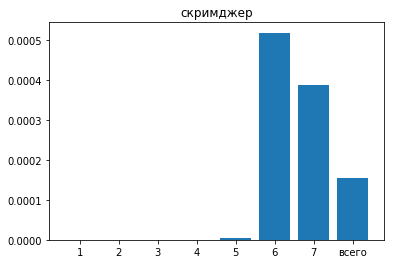

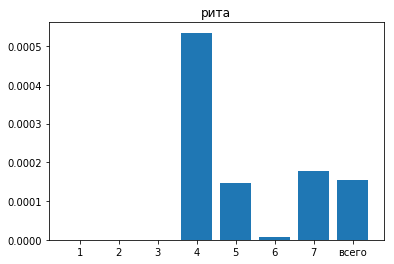

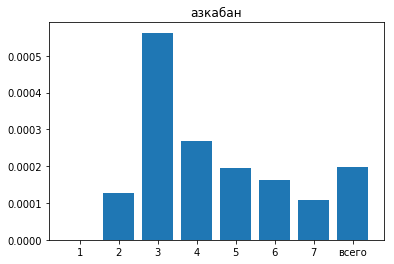

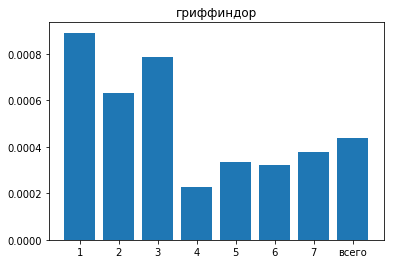

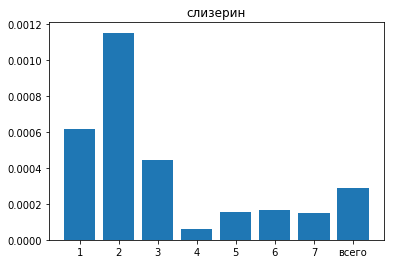

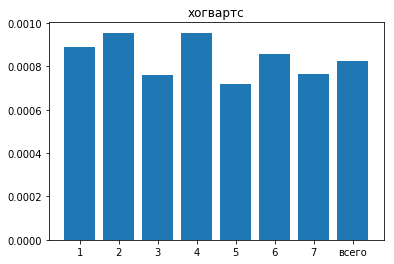

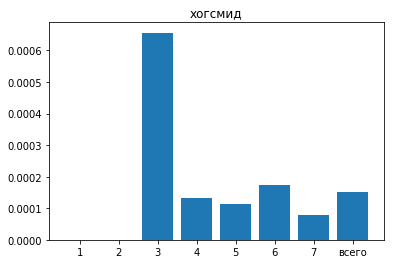

In [22]:
#персонажи
for cur_name in pers.index:
    plt.bar(pers.columns, pers.loc[cur_name])
    plt.title(cur_name)
    plt.show()

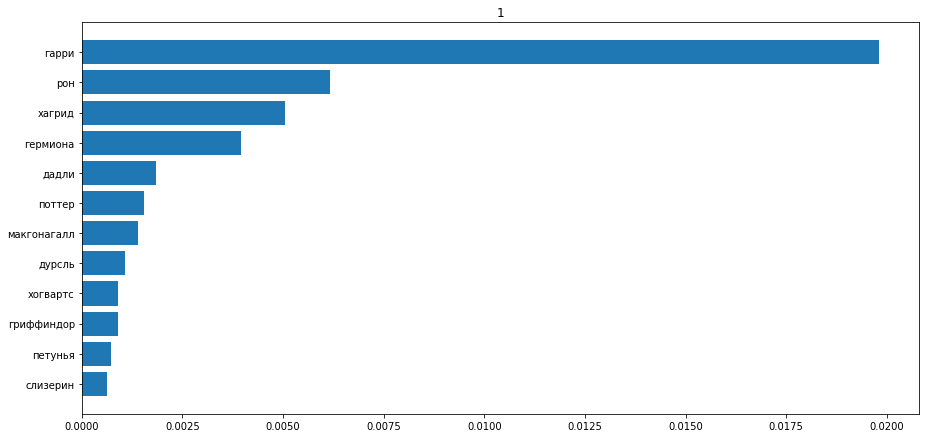

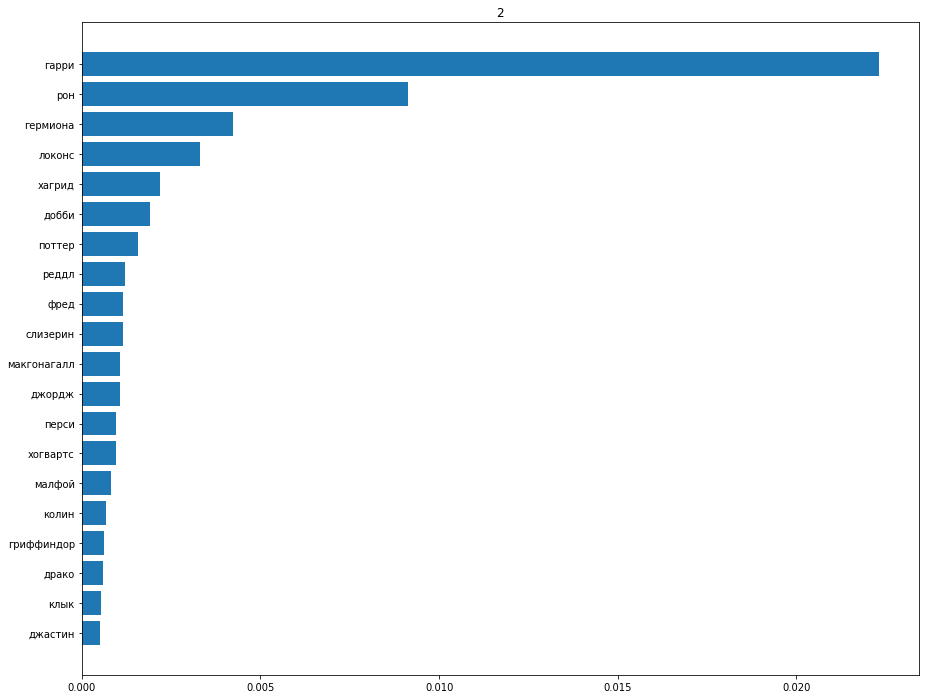

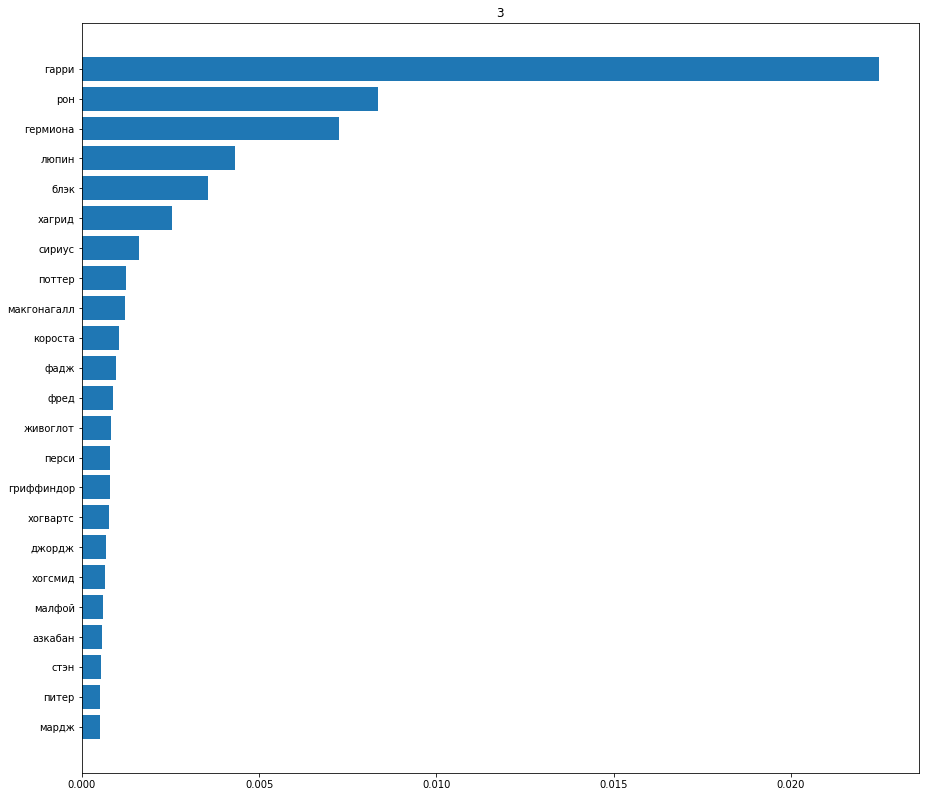

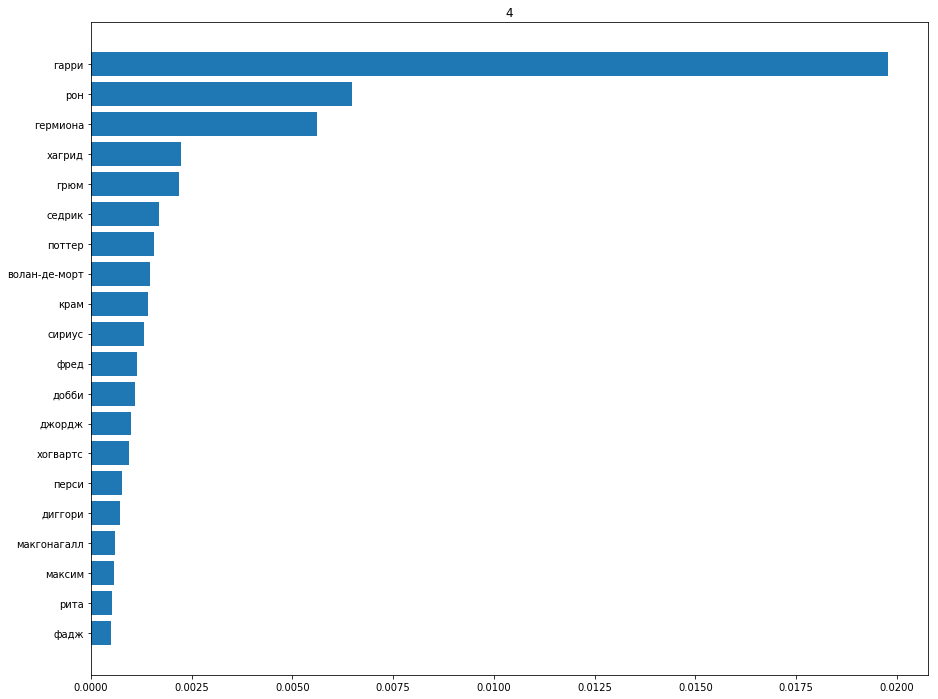

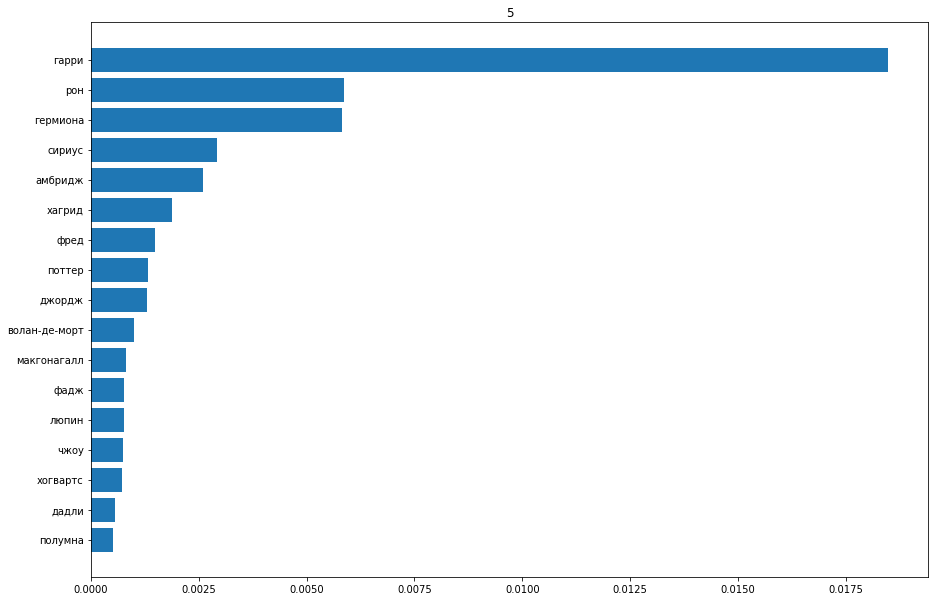

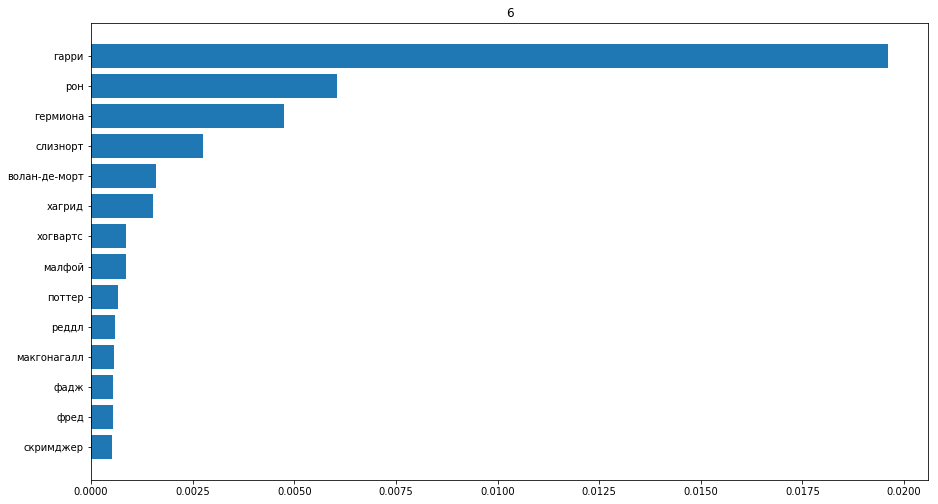

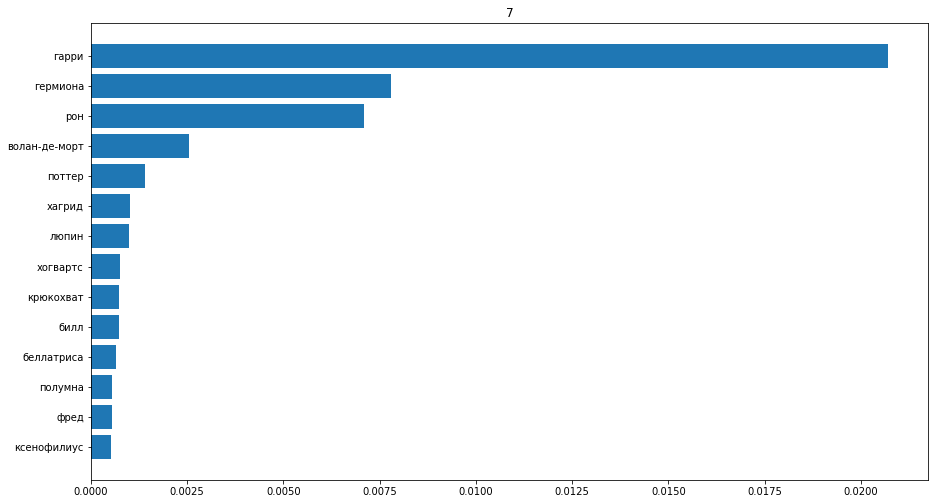

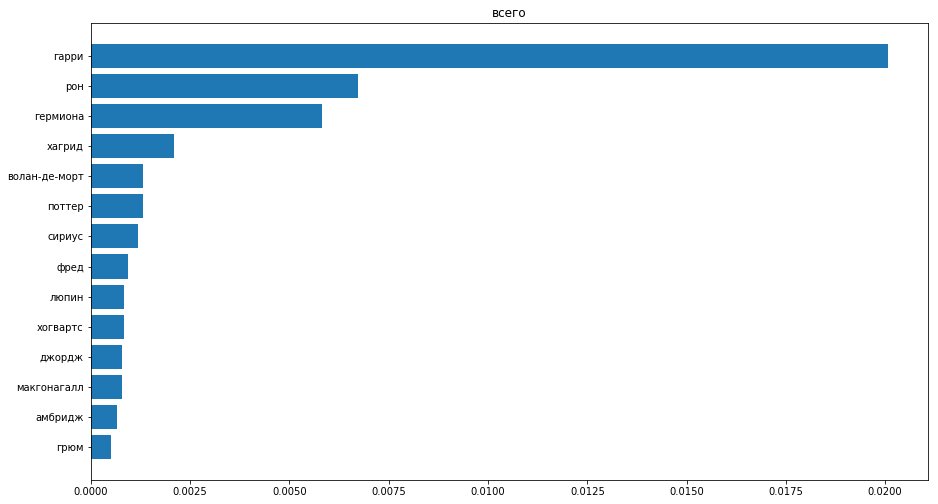

In [23]:
#имена собственные
for cur_book in pers.columns:
    tmp = pers[pers[cur_book] > 0.0005].sort_values(cur_book)
    y = len(tmp) * 0.6
    plt.figure(figsize=(15, y))
    plt.barh(tmp.index, tmp[cur_book])
    plt.title(cur_book)
    plt.show()

In [ ]:
Со именами нарицательными все гораздо сложнее
1. построим для всех выбранных частых имен нарицательных диаграммы встречаемости одного слова от номера книги
2. удалим из списка те слова, которые во всех книгах встречаются почти одинаково часто.
3. построим для оставшихся слов диаграммы встречаемости разных слов в одной книге 

In [24]:
#просто слова names_items_1 = ['боль', 'брат', 'взгляд', 'волос', 'вода', 'воздух', 'вопрос', 'время', 'глаз', 'голова', 'голос', 'дверь', 'дело', 'день', 'директор', 'дневник', 'друг',  'дядя', 'жизнь', 'замок', 'земля', 'зеркало', 'кабинет', 'камень', 'карман', 'карта', 'змея', 'класс', 'книга', 'команда', 'комната', 'конец', 'коридор', 'кровать', 'крыса', 'кубок', 'лестница', 'лицо', 'лорд', 'мадам', 'мальчик', 'мантия','матч', 'машина', 'медальон', 'метла', 'мимо', 'министерство', 'минута', 'миссис', 'мистер', 'молния', 'момент', 'мысль', 'нога', 'окно', 'отец', 'очки', 'палец', 'палочка', 'паук', 'пергамент', 'письмо', 'плечо', 'половина', 'премьер-министр', 'профессор', 'родитель',  'рука', 'свет', 'сегодня',  'секунда', 'сила',  'слово', 'случай', 'смерть', 'сова', 'спина', 'стена', 'стол', 'сторона',   'тело', 'туалет', 'турнир', 'тётя', 'улица', 'улыбка', 'урок', 'ученик',  'факультет', 'хозяин', 'чемпион',  'школа', 'шляпа', 'шрам', 'яйцо']
# волшебные предметы и существа names_items_2 = ['квиддич', 'снитч', 'крестраж', 'пожиратель', 'василиск', 'гиппогриф', 'гоблин', 'дементор', 'дракон', 'тролль', 'эльф']

names_items = ['квиддич', 'снитч', 'крестраж', 'пожиратель', 'василиск', 'гиппогриф', 'гоблин', 'дементор', 'дракон', 'тролль', 'эльф', 'боль', 'брат', 'взгляд', 'волос', 'вода', 'воздух', 'вопрос', 'время', 'глаз', 'голова', 'голос', 'дверь', 'дело', 'день', 'директор', 'дневник', 'друг',  'дядя', 'жизнь', 'замок', 'земля', 'зеркало', 'кабинет', 'камень', 'карман', 'карта', 'змея', 'класс', 'книга', 'команда', 'комната', 'конец', 'коридор', 'кровать', 'крыса', 'кубок', 'лестница', 'лицо', 'лорд', 'мадам', 'мальчик', 'мантия','матч', 'машина', 'медальон', 'метла', 'мимо', 'министерство', 'минута', 'миссис', 'мистер', 'молния', 'момент', 'мысль', 'нога', 'окно', 'отец', 'очки', 'палец', 'палочка', 'паук', 'пергамент', 'письмо', 'плечо', 'половина', 'премьер-министр', 'профессор', 'родитель',  'рука', 'свет', 'сегодня',  'секунда', 'сила',  'слово', 'случай', 'смерть', 'сова', 'спина', 'стена', 'стол', 'сторона',   'тело', 'туалет', 'турнир', 'тётя', 'улица', 'улыбка', 'урок', 'ученик',  'факультет', 'хозяин', 'чемпион',  'школа', 'шляпа', 'шрам', 'яйцо']
items = pd.DataFrame(columns = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for key in names_items:
    ar = []
    for i in range(len(itog_dict)):
        if (key in itog_dict[i].keys()):
            ar.append(itog_dict[i][key][1]) # нас интересуют относительные величины
        else:
            ar.append(0.0)
    items.loc[key] = ar

In [25]:
items

,1,2,3,4,5,6,7,всего
квиддич,0.000541,0.000168,0.000270,0.000407,0.000299,0.000263,0.000107,0.000285
снитч,0.000205,0.000211,0.000527,0.000080,0.000180,0.000081,0.000268,0.000201
крестраж,0.000000,0.000000,0.000000,0.000000,0.000000,0.000034,0.000072,0.000019
пожиратель,0.000000,0.000000,0.000000,0.000574,0.000559,0.000734,0.001234,0.000567
василиск,0.000000,0.000520,0.000000,0.000013,0.000019,0.000000,0.000066,0.000059
гиппогриф,0.000000,0.000000,0.000656,0.000047,0.000047,0.000034,0.000006,0.000086
гоблин,0.000217,0.000042,0.000012,0.000174,0.000095,0.000020,0.000870,0.000237
дементор,0.000000,0.000000,0.001652,0.000294,0.000507,0.000121,0.000298,0.000393
дракон,0.000638,0.000056,0.000047,0.000594,0.000057,0.000034,0.000292,0.000236
тролль,0.000686,0.000084,0.000070,0.000033,0.000085,0.000054,0.000030,0.000115


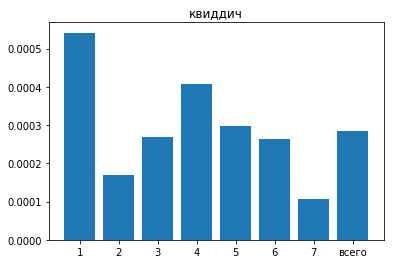

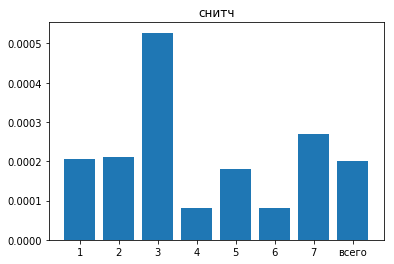

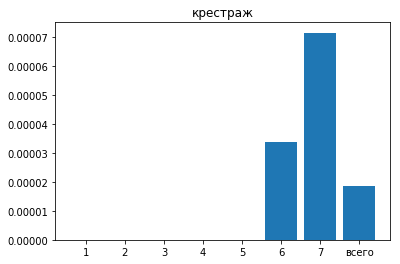

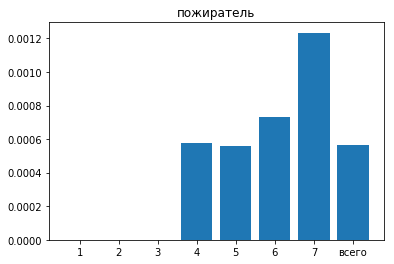

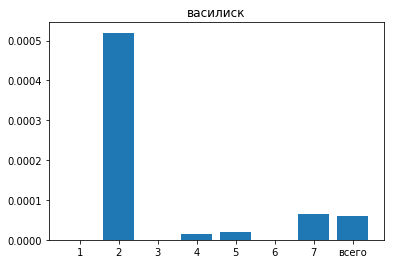

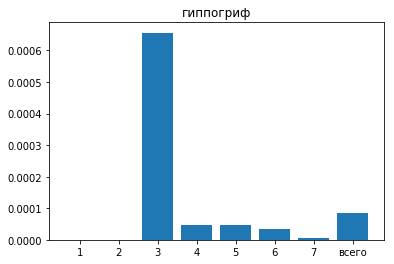

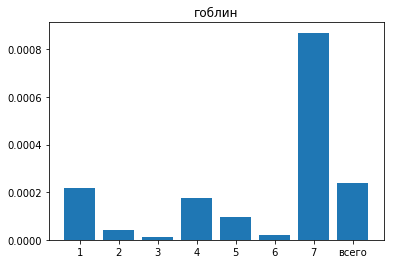

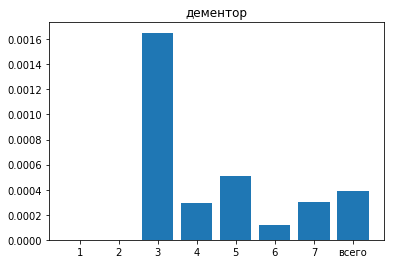

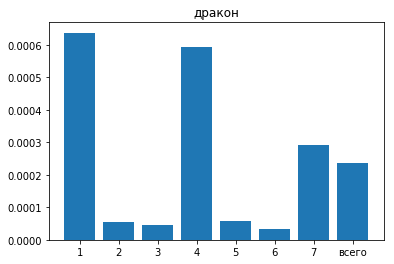

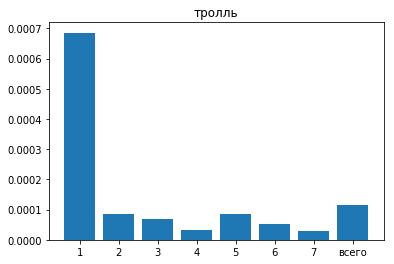

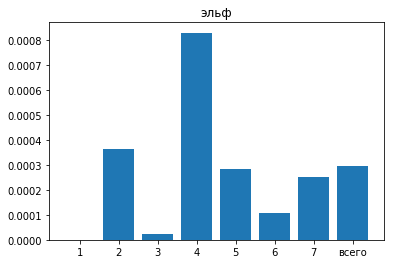

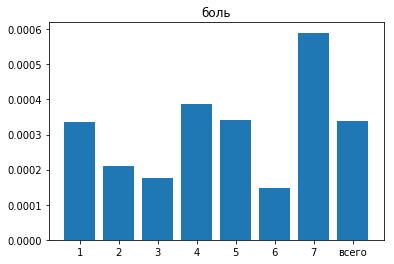

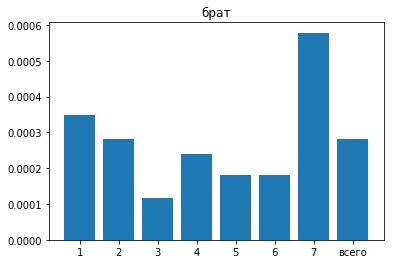

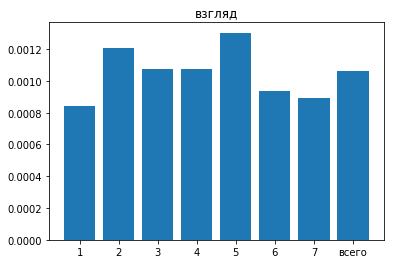

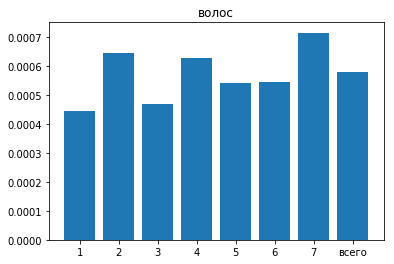

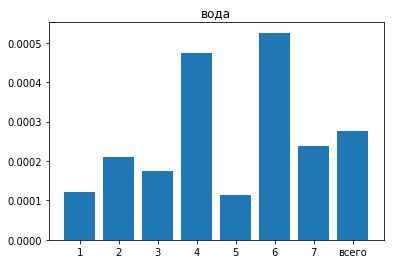

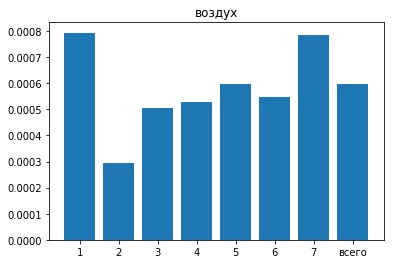

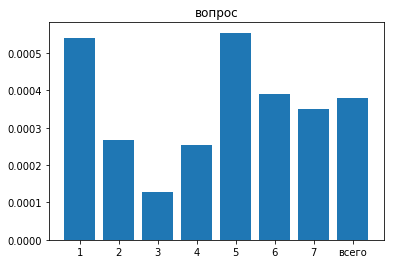

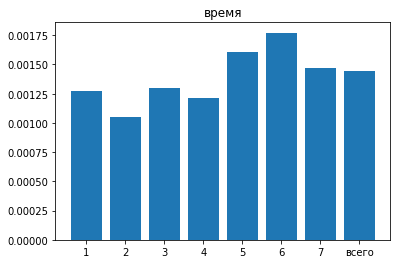

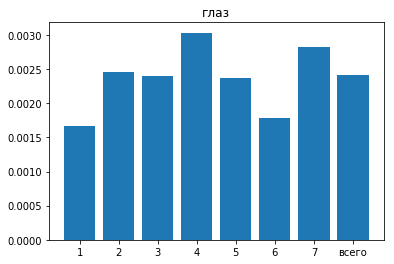

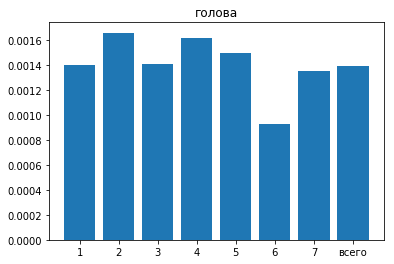

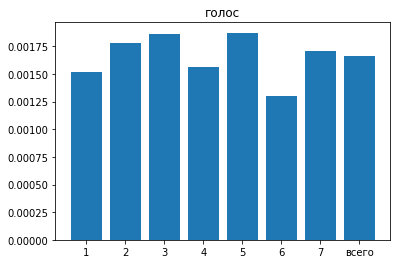

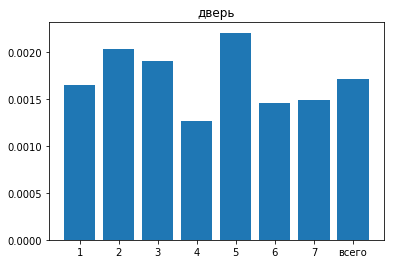

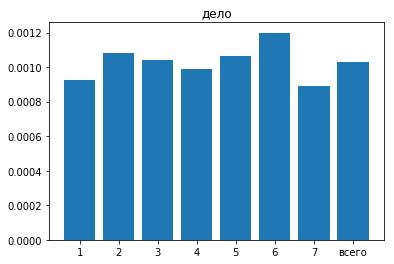

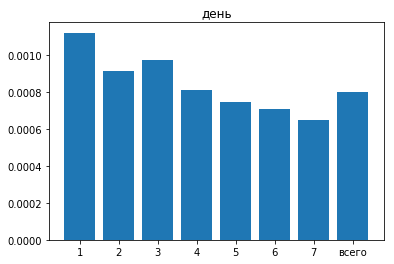

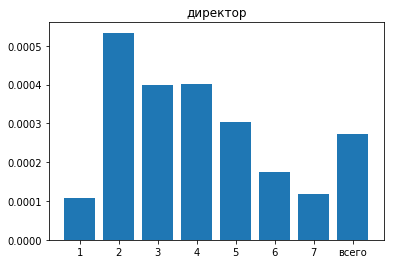

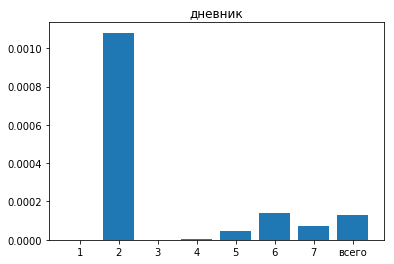

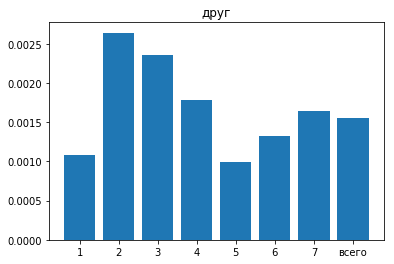

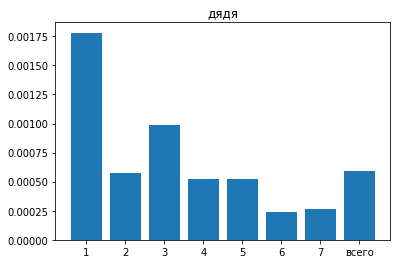

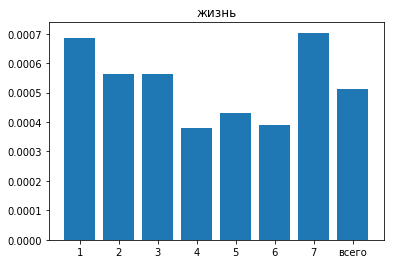

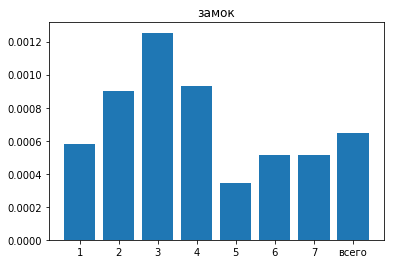

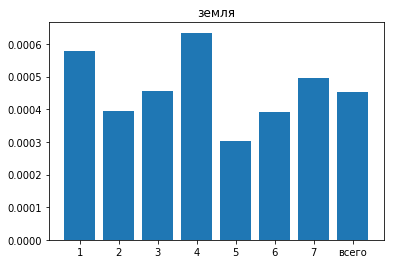

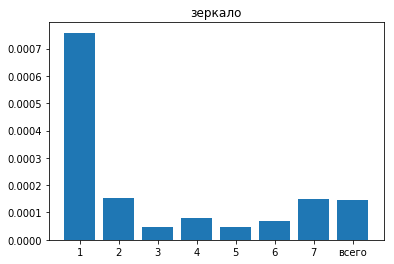

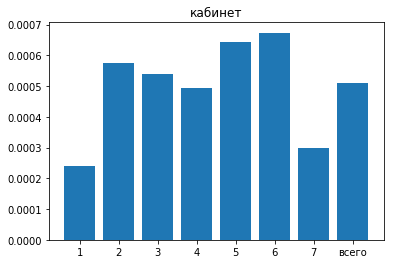

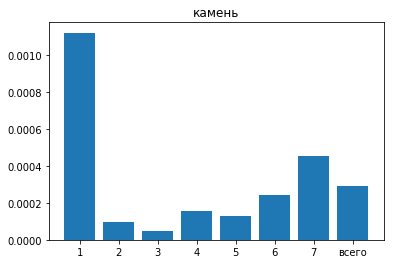

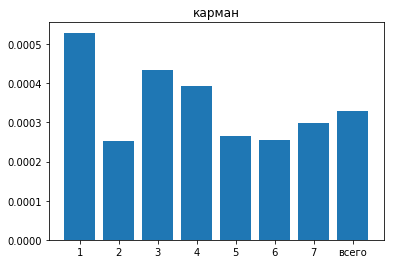

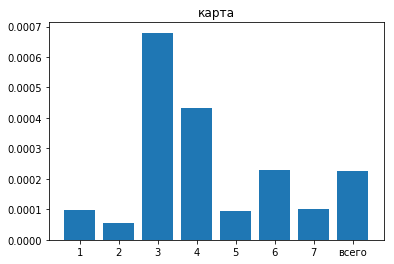

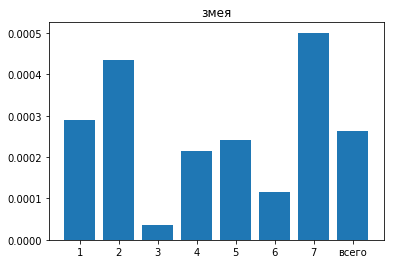

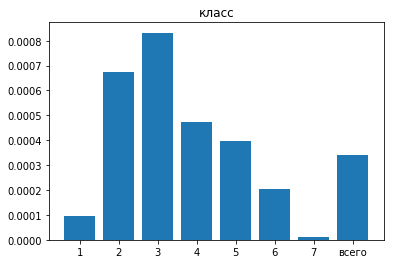

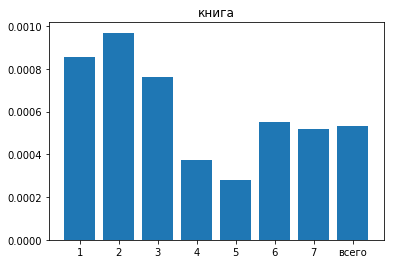

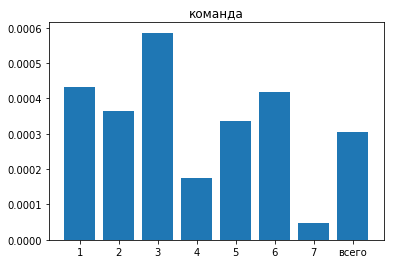

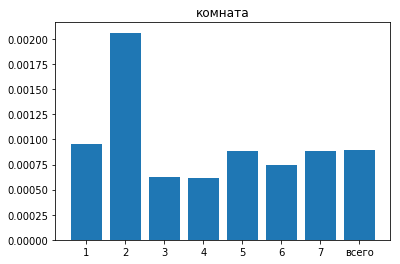

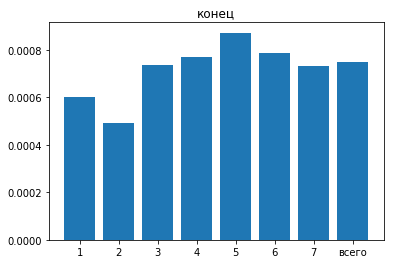

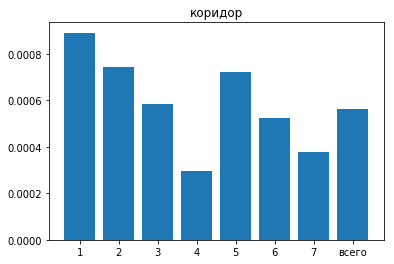

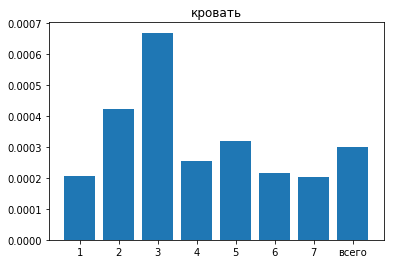

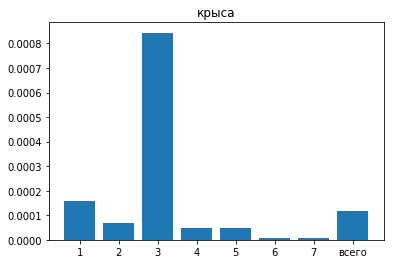

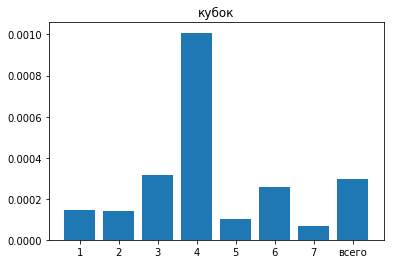

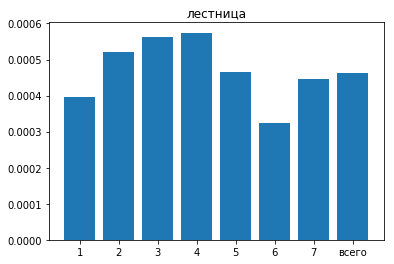

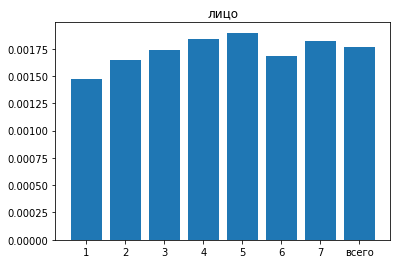

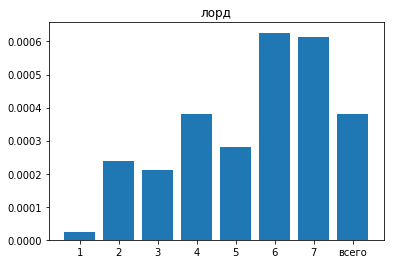

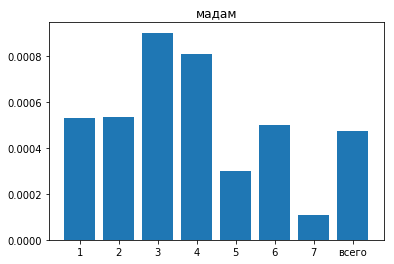

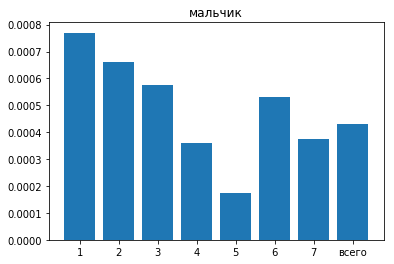

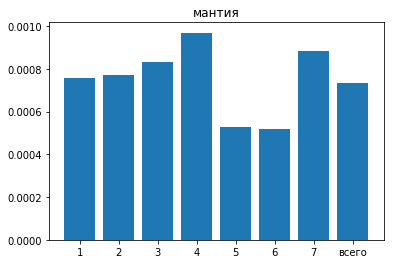

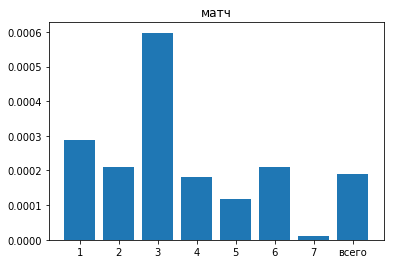

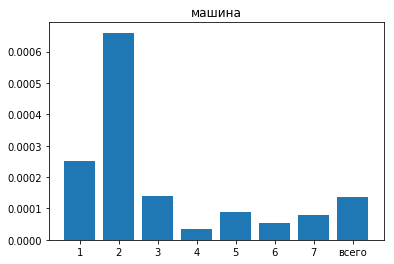

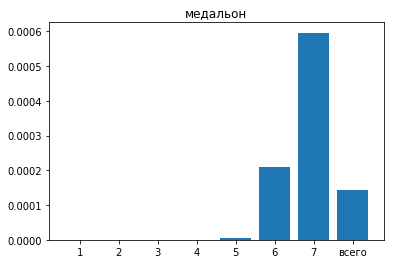

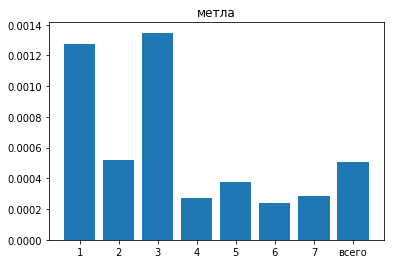

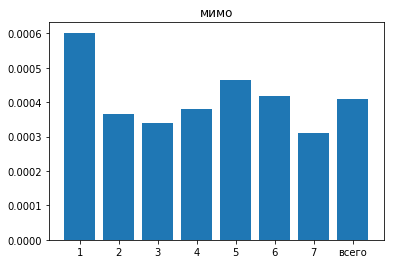

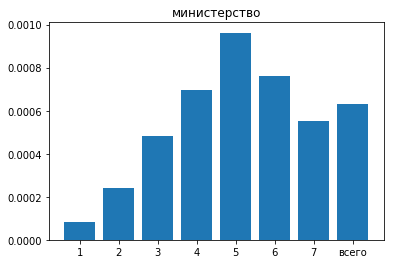

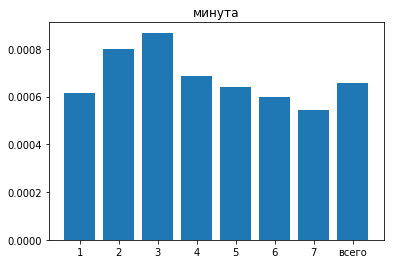

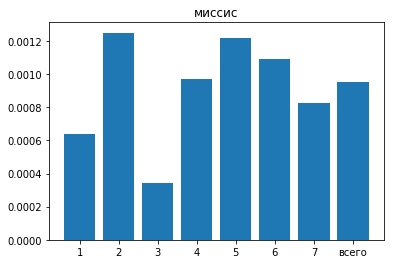

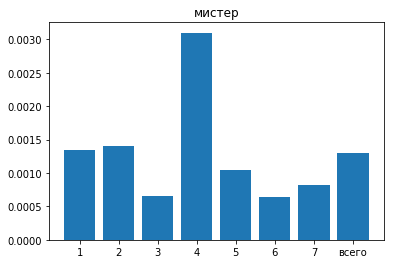

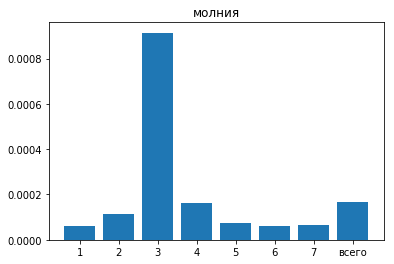

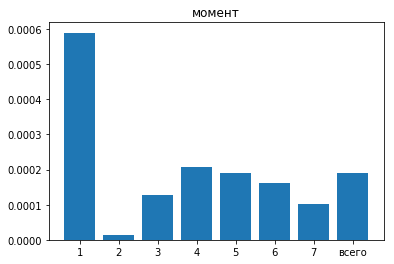

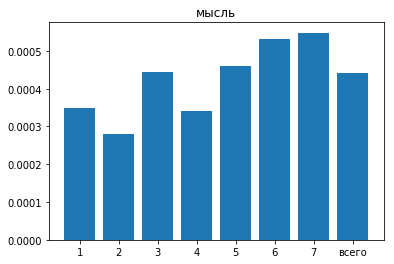

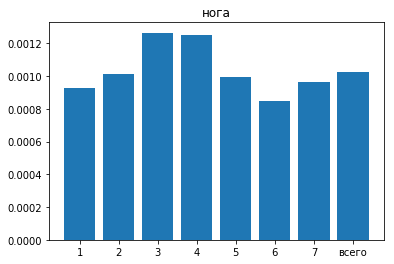

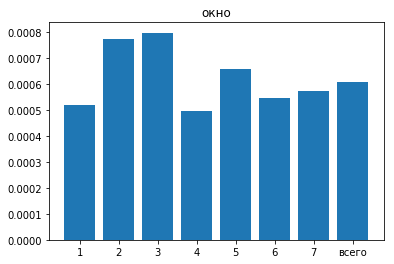

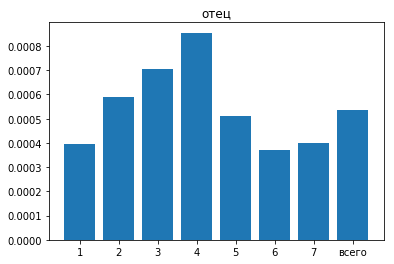

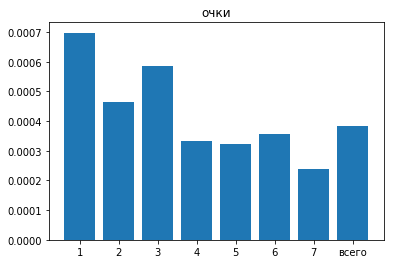

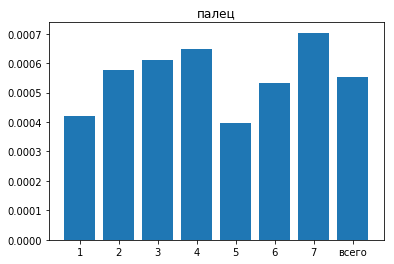

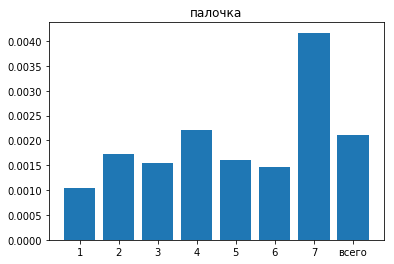

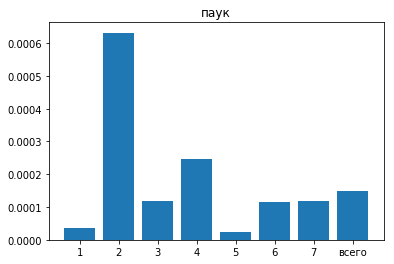

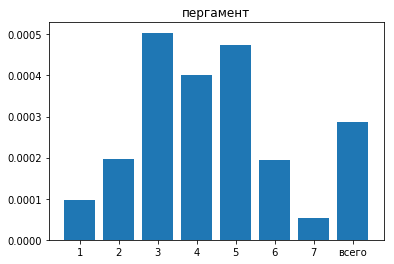

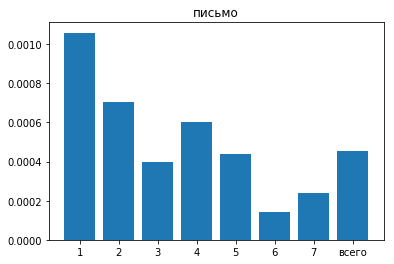

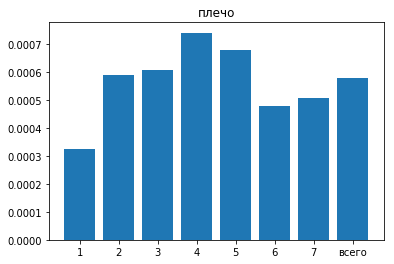

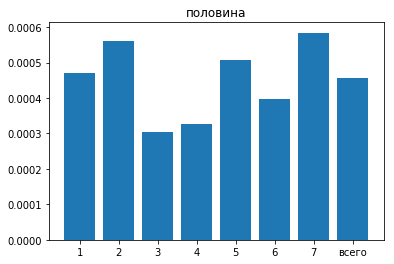

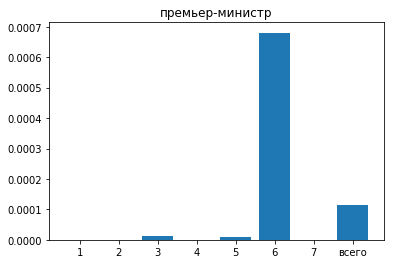

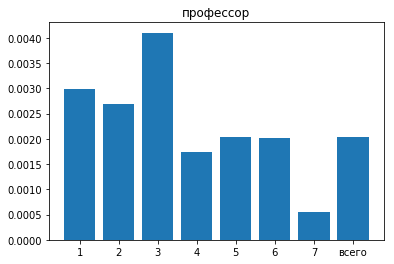

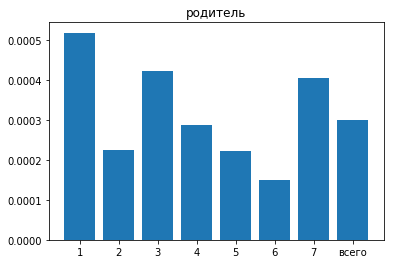

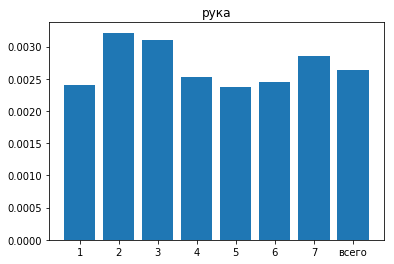

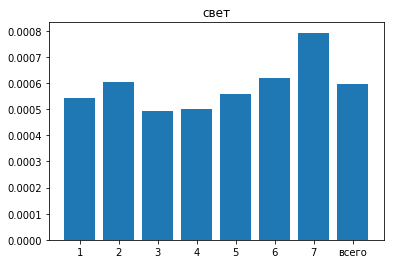

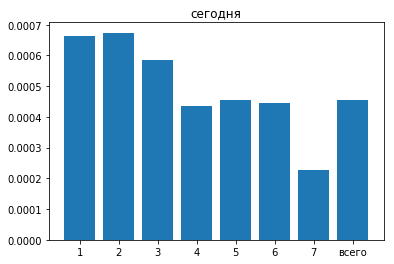

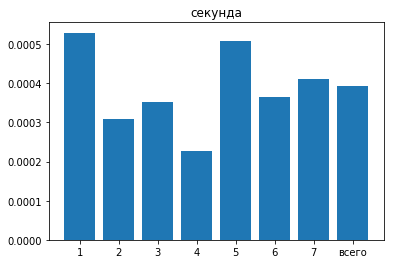

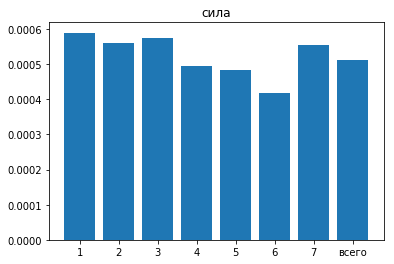

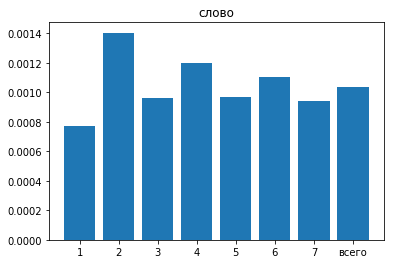

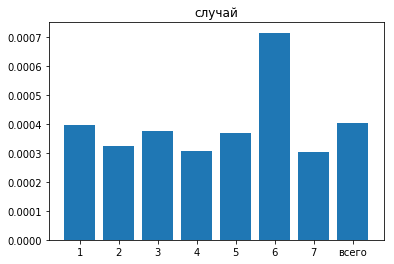

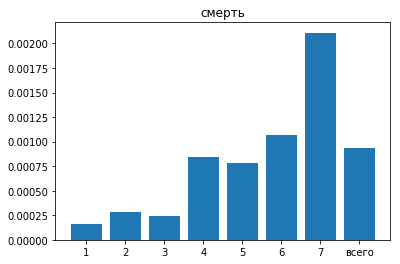

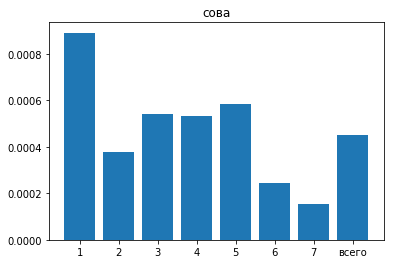

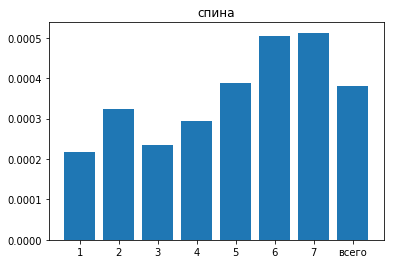

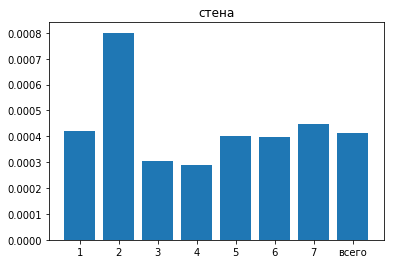

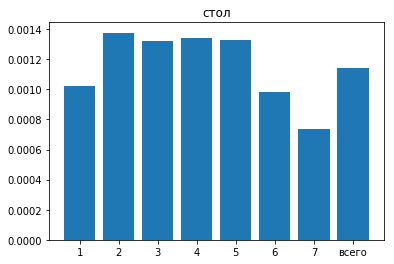

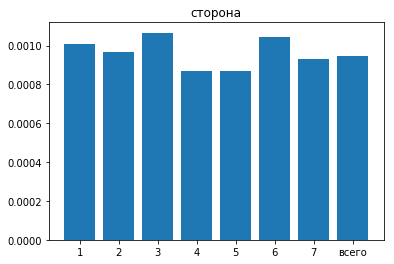

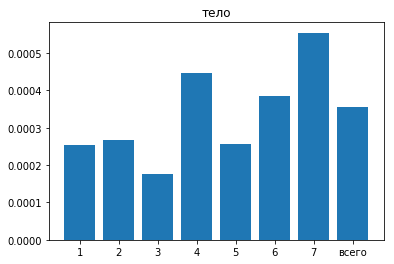

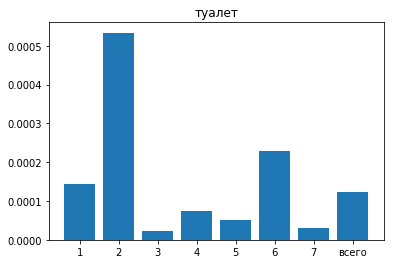

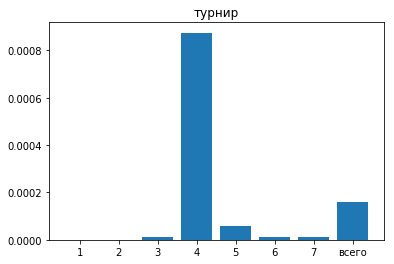

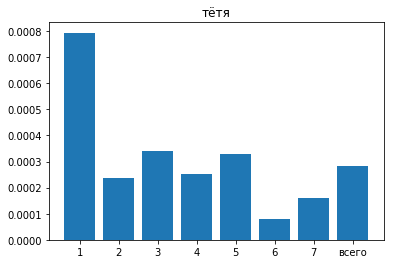

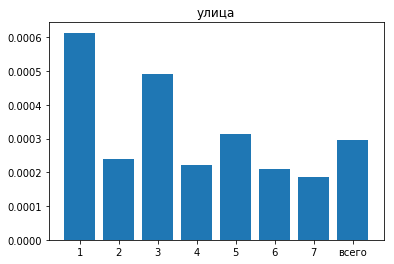

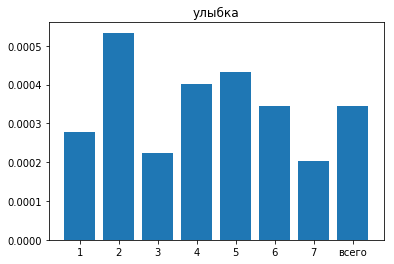

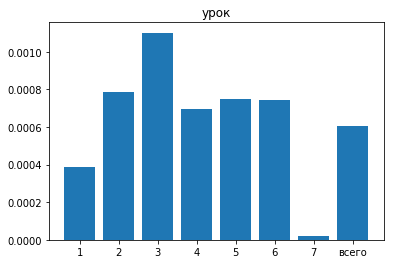

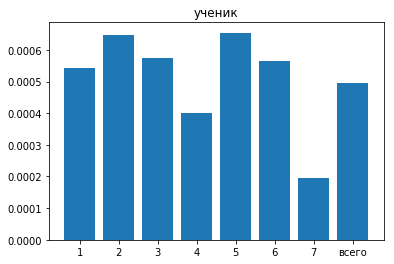

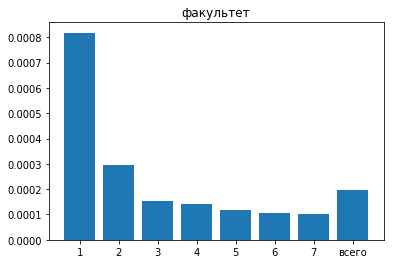

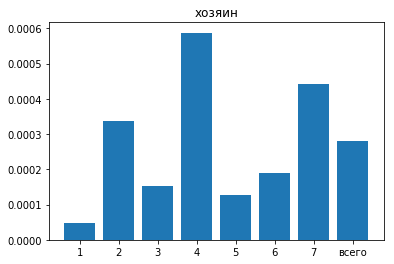

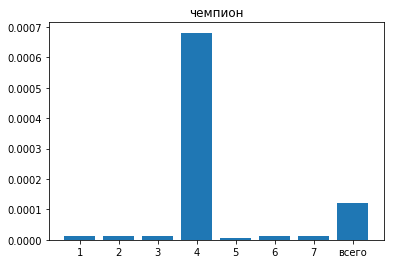

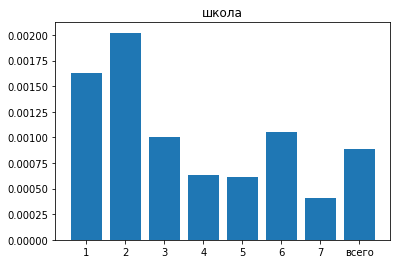

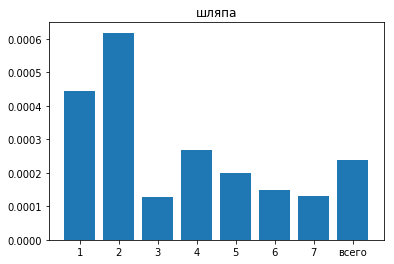

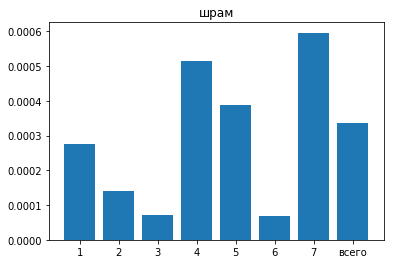

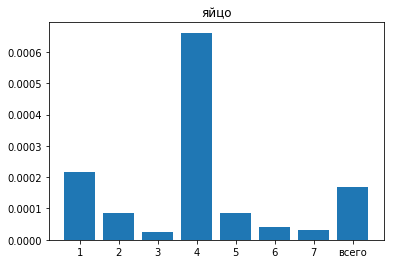

In [26]:
#предметы
for cur_name in items.index:
    plt.bar(items.columns, items.loc[cur_name])
    plt.title(cur_name)
    plt.show()

In [ ]:
Удаляем взгляд, волос, воздух, время, глаз, голова, голос, дверь, дело, день, земля, кабинет, конец, коридор, кровать, лестница, лицо, мадам, мантия, мимо, минута, миссис, мистер, мысль, нога, окно, очки, палец, плечо, половина, профессор, рука, свет, сегодня, секунда, сила, слово, спина, стол, сторона, улыбка, ученик

In [37]:
s = input().replace(',', '').split()

взгляд, волос, воздух, время, глаз, голова, голос, дверь, дело, день, земля, кабинет, конец, коридор, кровать, лестница, лицо, мадам, мантия, мимо, минута, миссис, мистер, мысль, нога, окно, очки, палец, плечо, половина, профессор, рука, свет, сегодня, секунда, сила, слово, спина, стол, сторона, улыбка, ученик


In [38]:
 s

['взгляд',
 'волос',
 'воздух',
 'время',
 'глаз',
 'голова',
 'голос',
 'дверь',
 'дело',
 'день',
 'земля',
 'кабинет',
 'конец',
 'коридор',
 'кровать',
 'лестница',
 'лицо',
 'мадам',
 'мантия',
 'мимо',
 'минута',
 'миссис',
 'мистер',
 'мысль',
 'нога',
 'окно',
 'очки',
 'палец',
 'плечо',
 'половина',
 'профессор',
 'рука',
 'свет',
 'сегодня',
 'секунда',
 'сила',
 'слово',
 'спина',
 'стол',
 'сторона',
 'улыбка',
 'ученик']

In [39]:
names_items = list(set(names_items) - set(s))

In [40]:
names_items

['тело',
 'команда',
 'турнир',
 'шляпа',
 'вопрос',
 'премьер-министр',
 'дневник',
 'туалет',
 'тётя',
 'камень',
 'директор',
 'стена',
 'метла',
 'машина',
 'крыса',
 'смерть',
 'школа',
 'палочка',
 'министерство',
 'карта',
 'тролль',
 'хозяин',
 'гоблин',
 'дементор',
 'медальон',
 'дракон',
 'пожиратель',
 'факультет',
 'отец',
 'вода',
 'зеркало',
 'лорд',
 'гиппогриф',
 'друг',
 'пергамент',
 'сова',
 'чемпион',
 'эльф',
 'молния',
 'родитель',
 'карман',
 'паук',
 'класс',
 'снитч',
 'жизнь',
 'яйцо',
 'улица',
 'квиддич',
 'замок',
 'урок',
 'кубок',
 'случай',
 'брат',
 'письмо',
 'дядя',
 'книга',
 'момент',
 'мальчик',
 'боль',
 'змея',
 'шрам',
 'василиск',
 'крестраж',
 'матч']

In [41]:
items = pd.DataFrame(columns = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for key in names_items:
    ar = []
    for i in range(len(itog_dict)):
        if (key in itog_dict[i].keys()):
            ar.append(itog_dict[i][key][1]) # нас интересуют относительные величины
        else:
            ar.append(0.0)
    items.loc[key] = ar

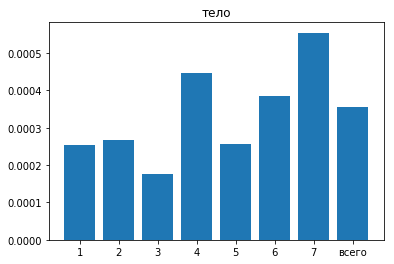

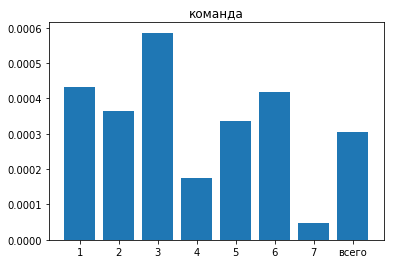

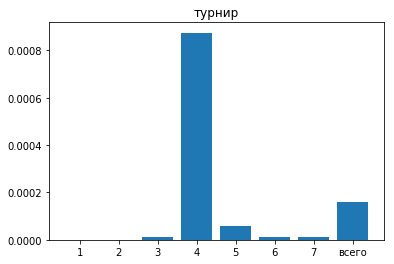

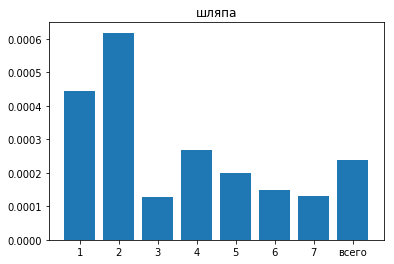

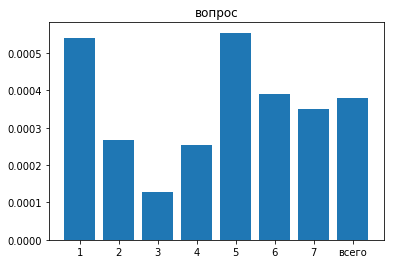

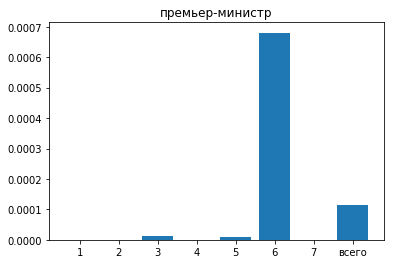

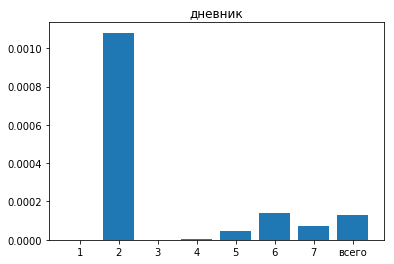

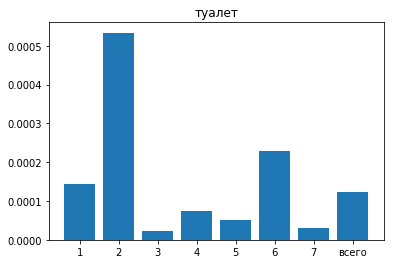

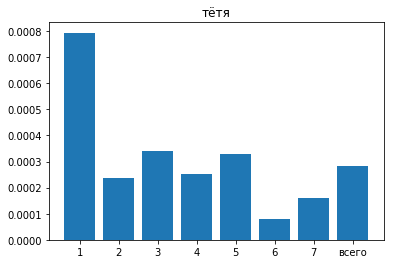

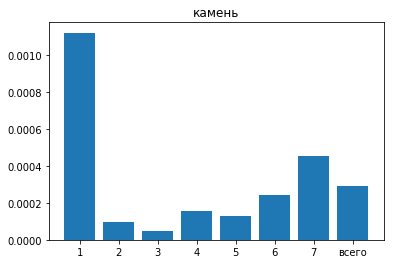

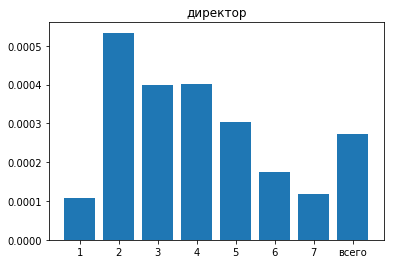

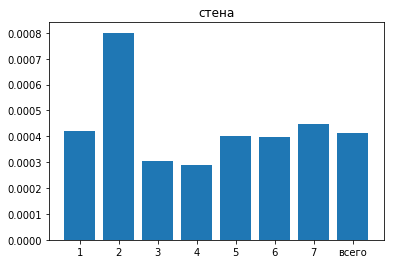

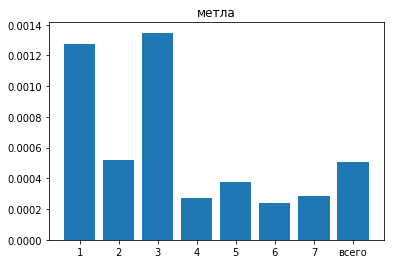

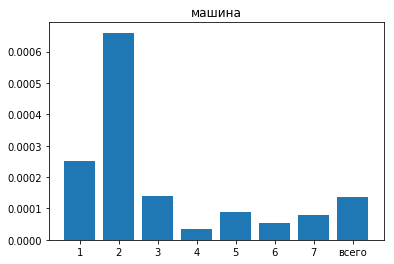

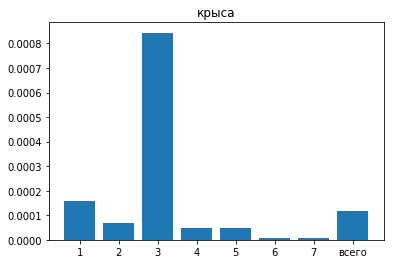

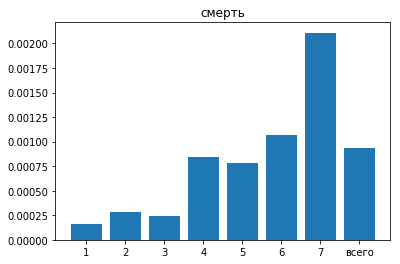

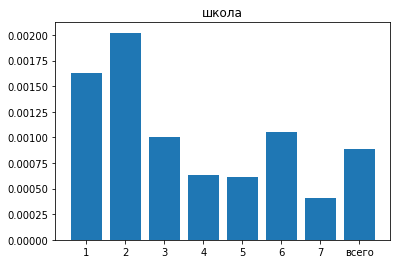

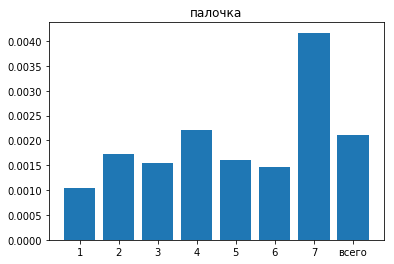

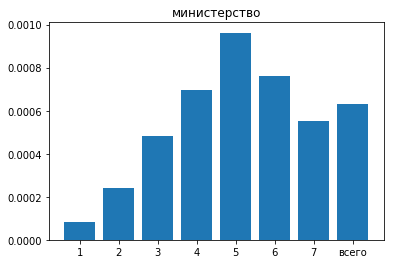

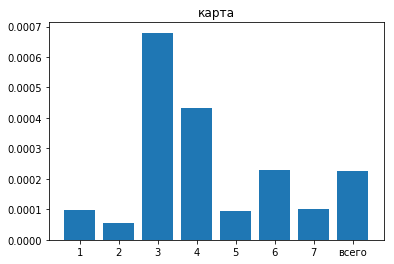

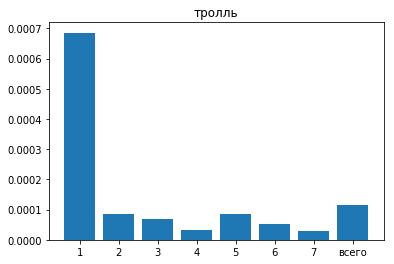

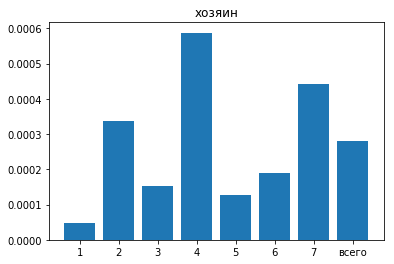

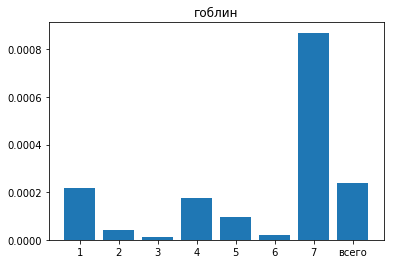

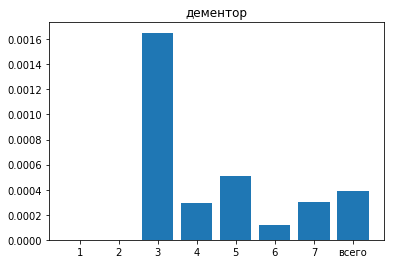

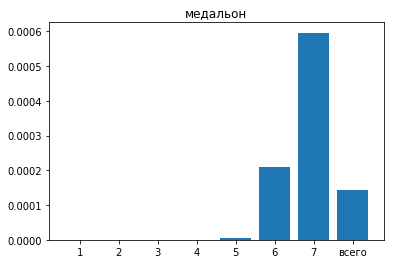

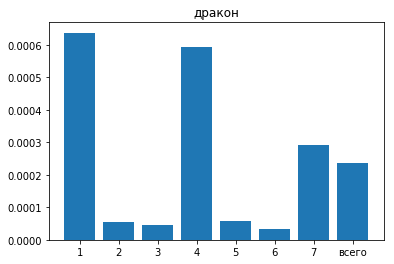

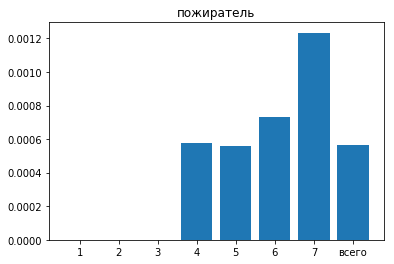

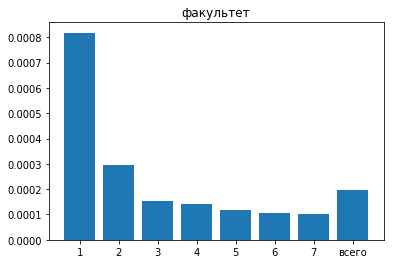

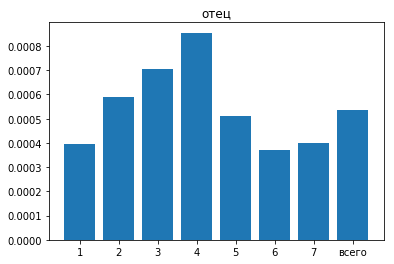

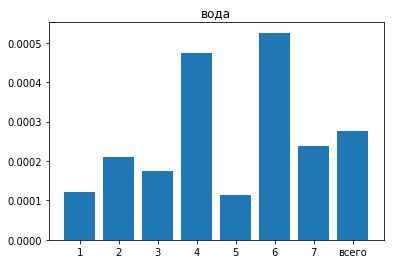

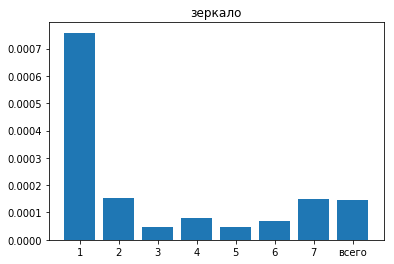

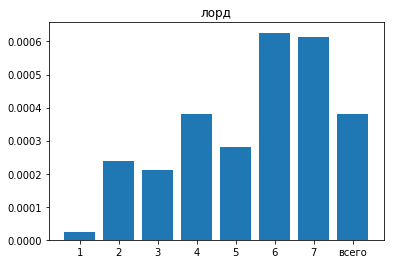

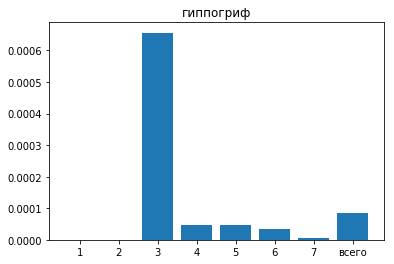

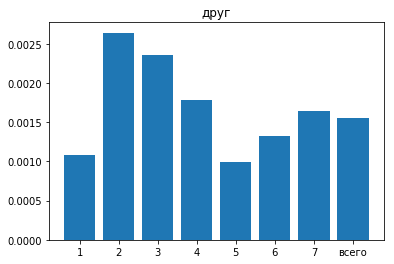

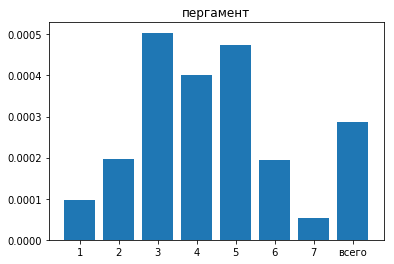

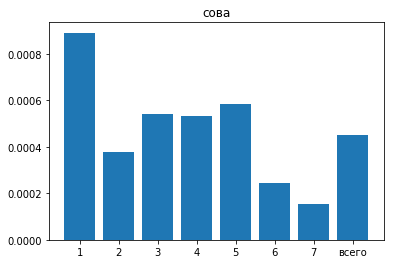

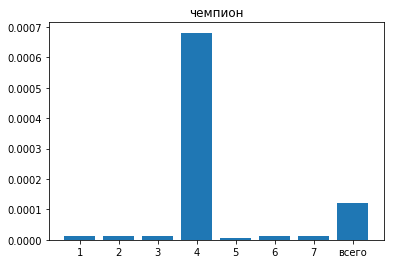

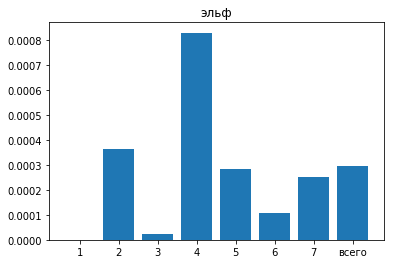

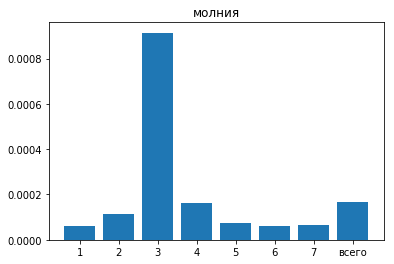

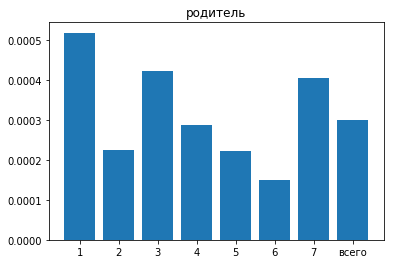

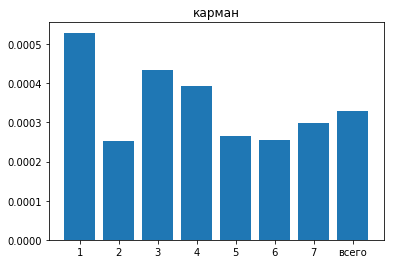

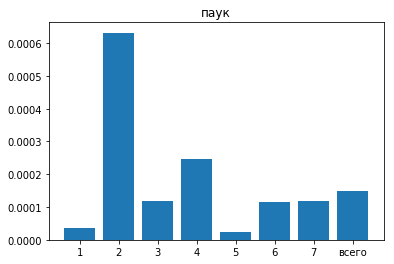

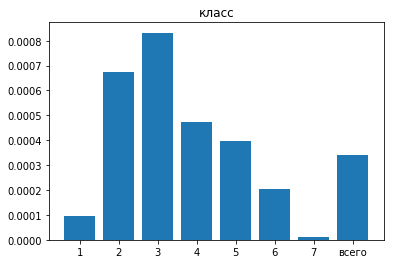

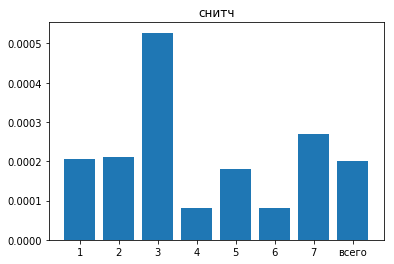

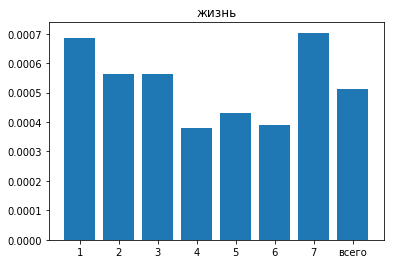

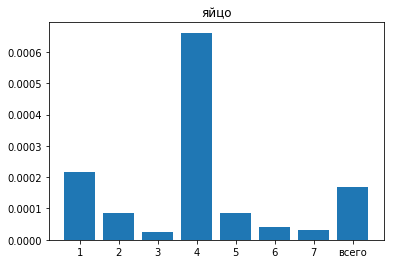

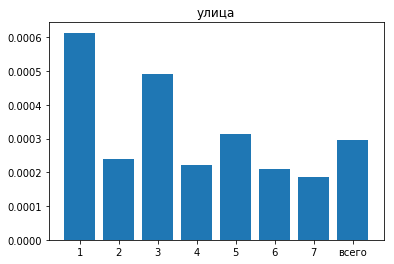

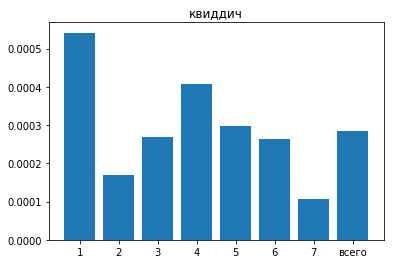

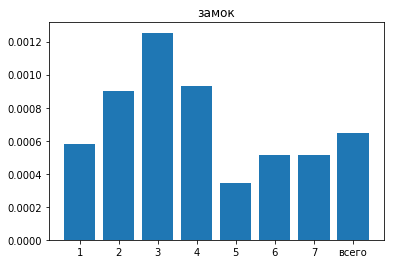

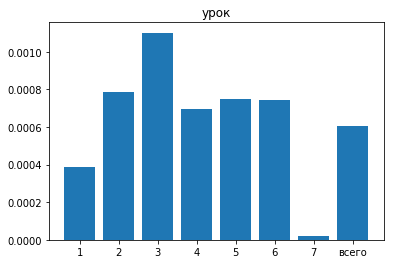

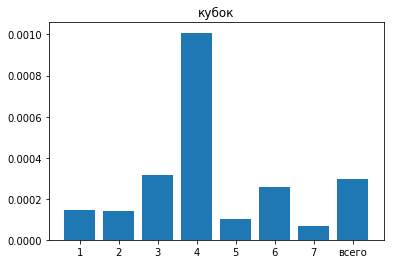

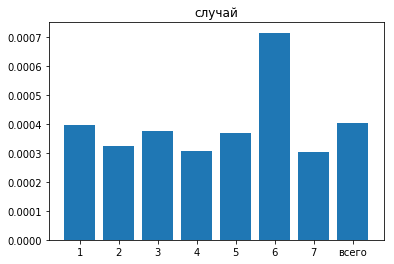

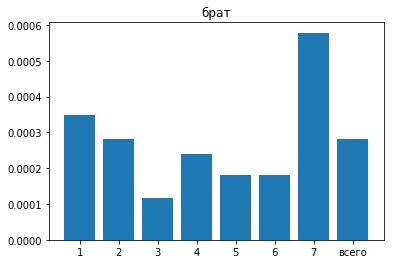

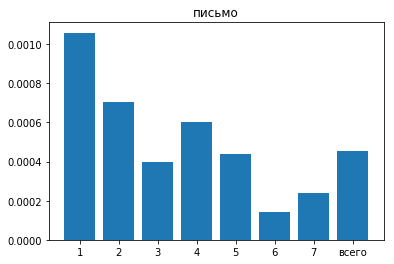

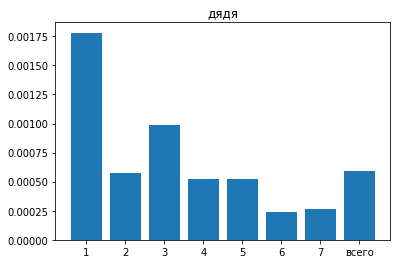

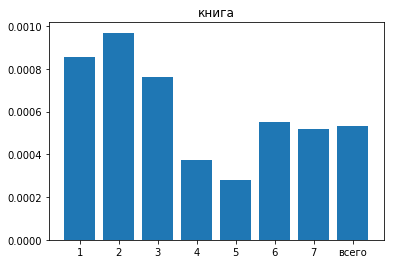

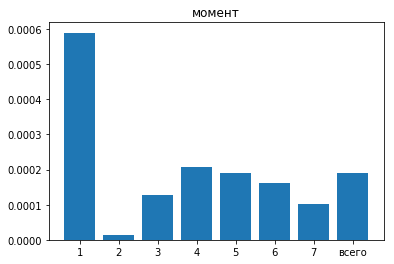

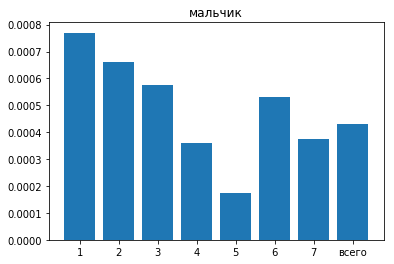

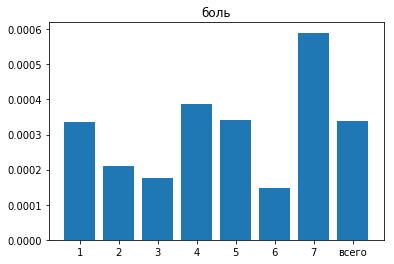

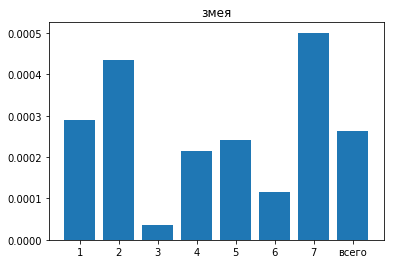

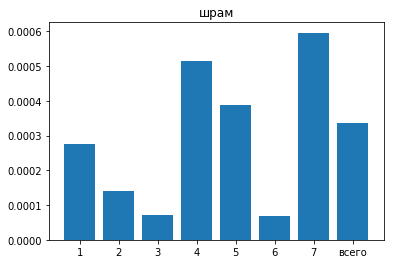

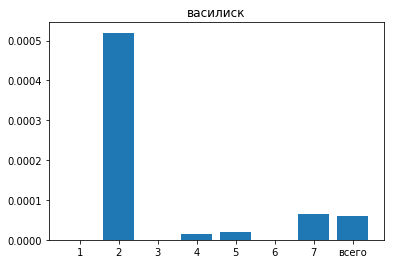

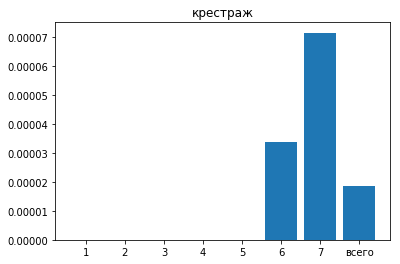

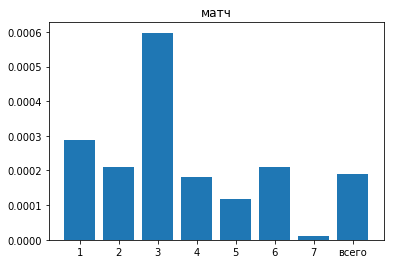

In [42]:
#предметы
for cur_name in items.index:
    plt.bar(items.columns, items.loc[cur_name])
    plt.title(cur_name)
    plt.show()

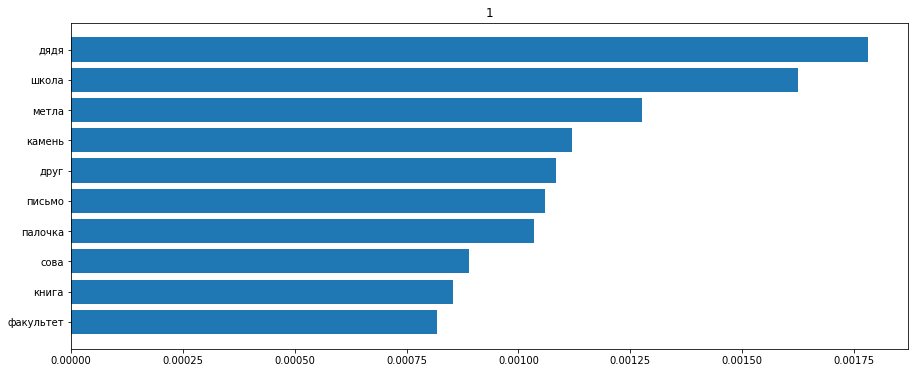

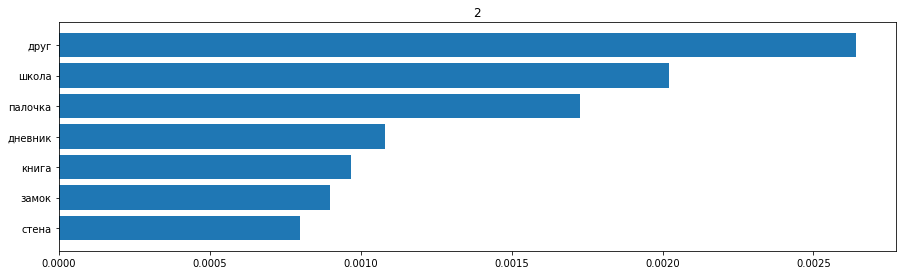

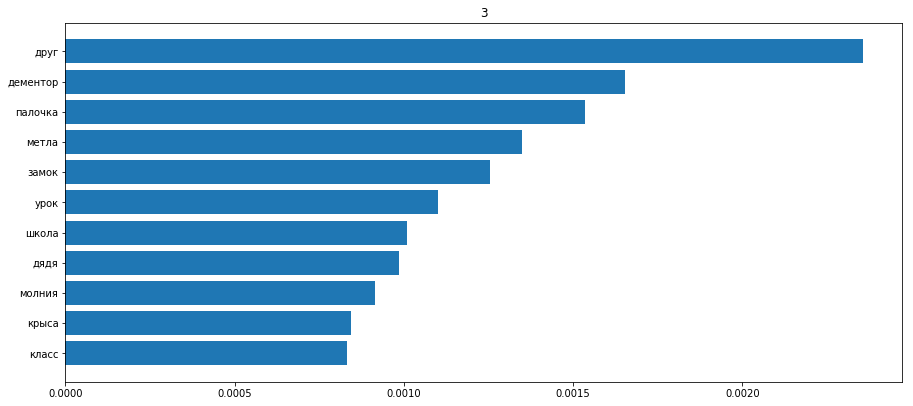

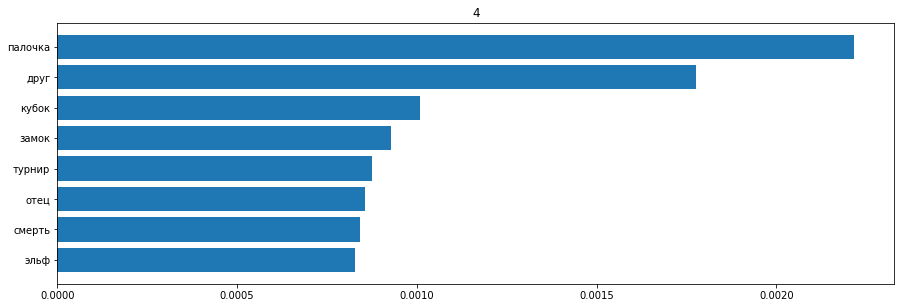

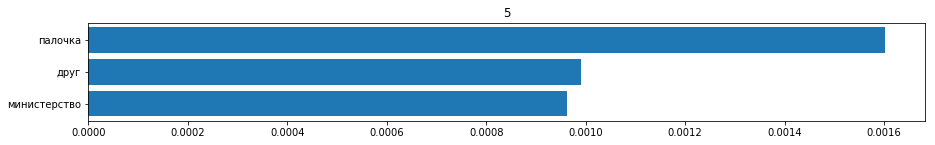

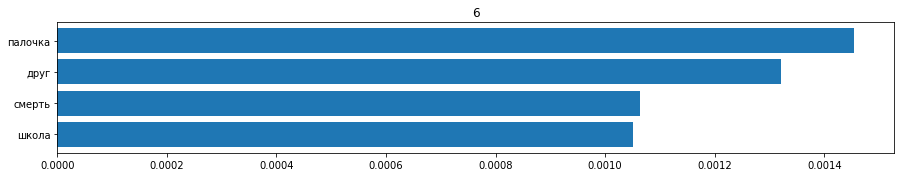

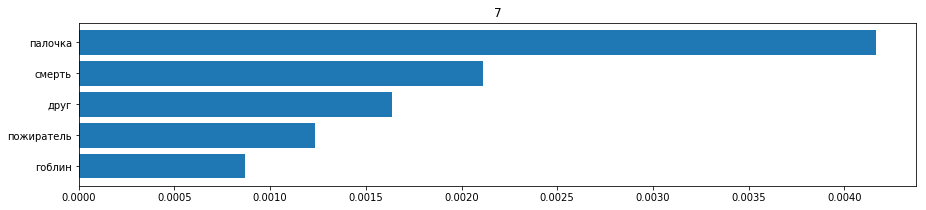

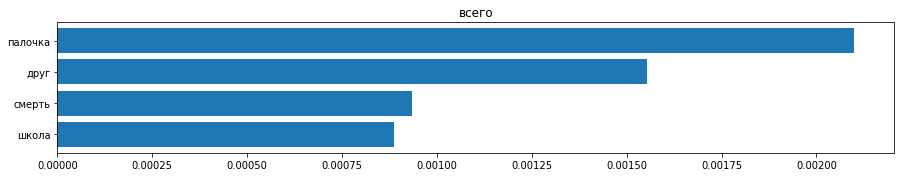

In [43]:
#имена нарицательные и с колебаниями
for cur_book in items.columns:
    tmp = items[items[cur_book] > 0.0008].sort_values(cur_book)
    y = len(tmp) * 0.6
    plt.figure(figsize=(15, y))
    plt.barh(tmp.index, tmp[cur_book])
    plt.title(cur_book)
    plt.show()

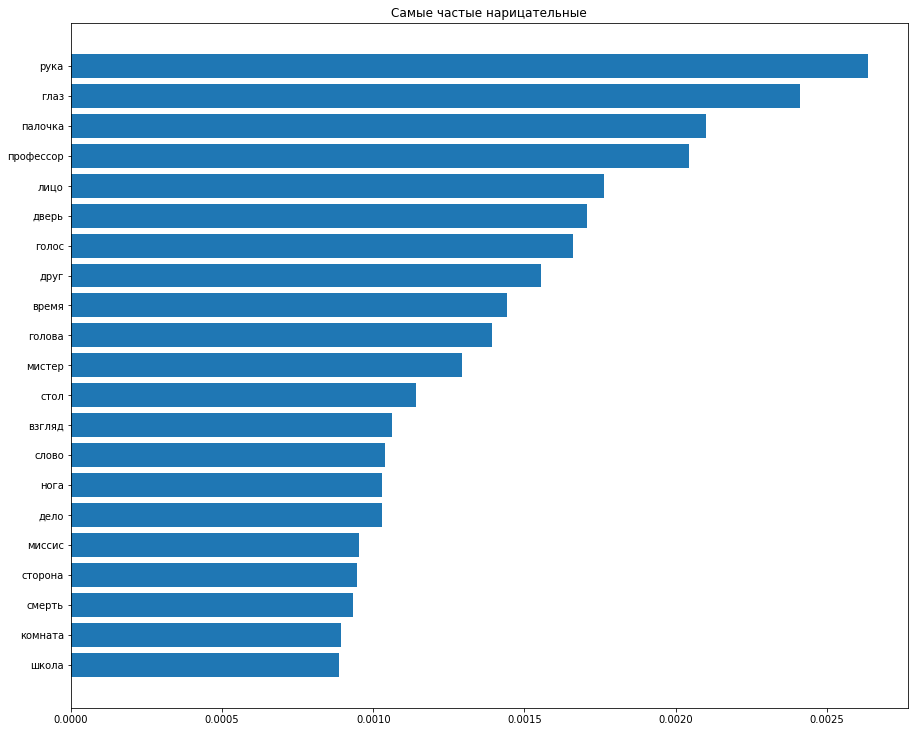

In [45]:
#По всей серии самые частые имена нарицательные
names_items_2 = ['квиддич', 'снитч', 'крестраж', 'пожиратель', 'василиск', 'гиппогриф', 'гоблин', 'дементор', 'дракон', 'тролль', 'эльф', 'боль', 'брат', 'взгляд', 'волос', 'вода', 'воздух', 'вопрос', 'время', 'глаз', 'голова', 'голос', 'дверь', 'дело', 'день', 'директор', 'дневник', 'друг',  'дядя', 'жизнь', 'замок', 'земля', 'зеркало', 'кабинет', 'камень', 'карман', 'карта', 'змея', 'класс', 'книга', 'команда', 'комната', 'конец', 'коридор', 'кровать', 'крыса', 'кубок', 'лестница', 'лицо', 'лорд', 'мадам', 'мальчик', 'мантия','матч', 'машина', 'медальон', 'метла', 'мимо', 'министерство', 'минута', 'миссис', 'мистер', 'молния', 'момент', 'мысль', 'нога', 'окно', 'отец', 'очки', 'палец', 'палочка', 'паук', 'пергамент', 'письмо', 'плечо', 'половина', 'премьер-министр', 'профессор', 'родитель',  'рука', 'свет', 'сегодня',  'секунда', 'сила',  'слово', 'случай', 'смерть', 'сова', 'спина', 'стена', 'стол', 'сторона',   'тело', 'туалет', 'турнир', 'тётя', 'улица', 'улыбка', 'урок', 'ученик',  'факультет', 'хозяин', 'чемпион',  'школа', 'шляпа', 'шрам', 'яйцо']
items_2 = pd.DataFrame(columns = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for key in names_items_2:
    ar = []
    for i in range(len(itog_dict)):
        if (key in itog_dict[i].keys()):
            ar.append(itog_dict[i][key][1]) # нас интересуют относительные величины
        else:
            ar.append(0.0)
    items_2.loc[key] = ar
tmp = items_2[items_2['всего'] > 0.0008].sort_values('всего')
y = len(tmp) * 0.6
plt.figure(figsize=(15, y))
plt.barh(tmp.index, tmp['всего'])
plt.title("Самые частые нарицательные")
plt.show()

In [10]:
df = pd.DataFrame(rel_dicts, index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])

NameError: name 'rel_dicts' is not defined

In [20]:
df = df.replace(np.nan, 0)

In [21]:
df

,азкабан,альбус,амбридж,беллатриса,билл,блэк,более,боль,большой,брат,...,чжоу,чуть,чёрный,школа,шляпа,шрам,эльф,этот,явно,яйцо
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001660,0.000000,...,0.00000,0.000000,0.000578,0.001624,0.000000,0.000000,0.000000,0.002791,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001868,0.000000,...,0.00000,0.000604,0.000969,0.002022,0.000618,0.000000,0.000000,0.002696,0.000548,0.000000
3,0.000562,0.000000,0.000000,0.000000,0.000000,0.003551,0.000000,0.00000,0.001851,0.000000,...,0.00000,0.000645,0.000527,0.001008,0.000000,0.000000,0.000000,0.002203,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001917,0.000000,...,0.00000,0.000000,0.000962,0.000635,0.000000,0.000514,0.000828,0.002151,0.000000,0.000661
5,0.000000,0.000000,0.002598,0.000000,0.000000,0.000000,0.000000,0.00000,0.001910,0.000000,...,0.00074,0.000645,0.000564,0.000616,0.000000,0.000000,0.000000,0.002394,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000539,0.00000,0.002062,0.000000,...,0.00000,0.000000,0.000647,0.001051,0.000000,0.000000,0.000000,0.002688,0.000000,0.000000
7,0.000000,0.000715,0.000000,0.000644,0.000733,0.000000,0.000000,0.00059,0.001770,0.000578,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000596,0.000000,0.002712,0.000000,0.000000
всего,0.000000,0.000000,0.000660,0.000000,0.000000,0.000000,0.000000,0.00000,0.001879,0.000000,...,0.00000,0.000000,0.000651,0.000888,0.000000,0.000000,0.000000,0.002502,0.000000,0.000000


In [25]:

items = pd.DataFrame(index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for cur_it in names_words:
    items[cur_it] = df[cur_it]
magic_items = pd.DataFrame(index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for cur_it in names_magic_words:
    magic_items[cur_it] = df[cur_it]

In [ ]:
'один' ???

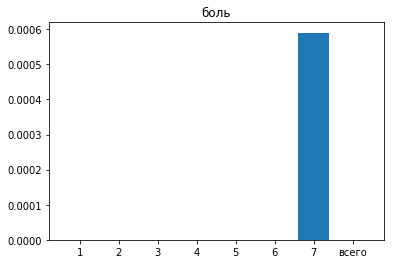

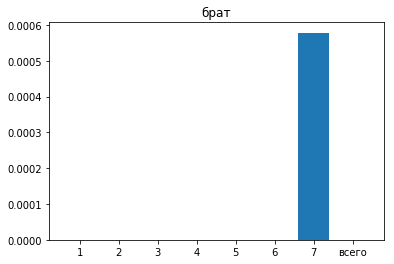

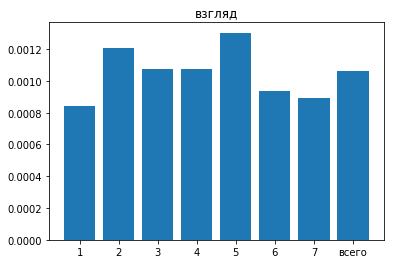

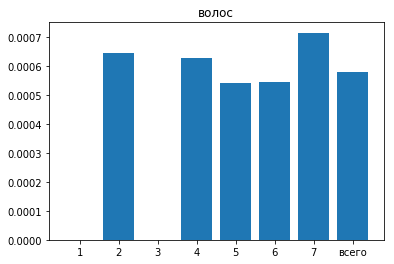

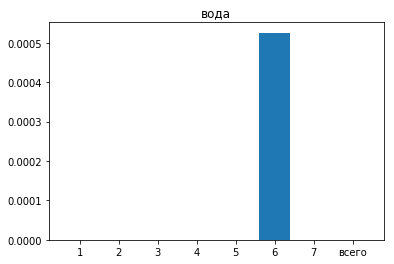

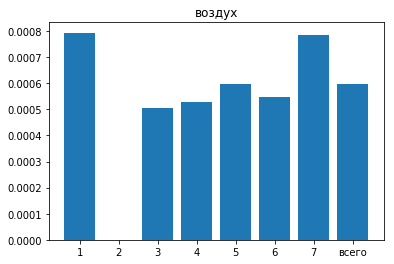

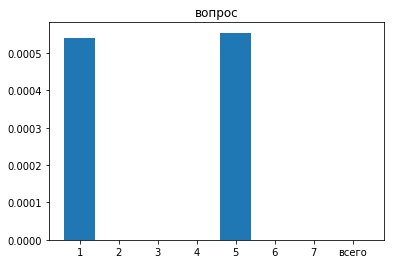

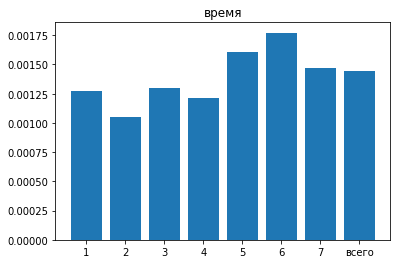

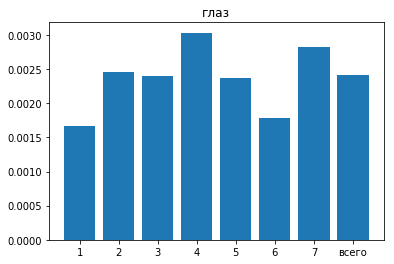

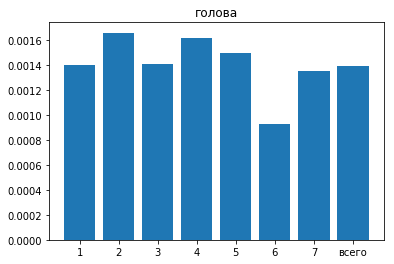

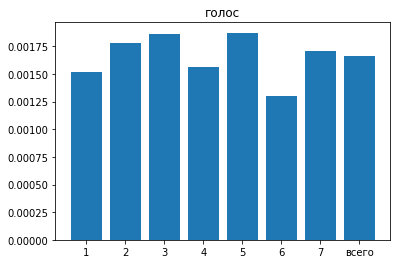

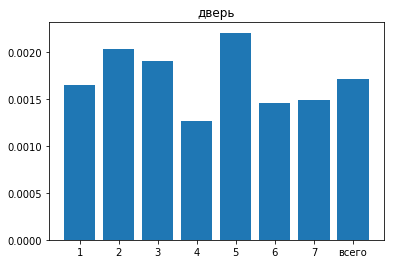

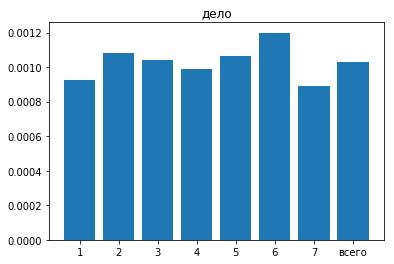

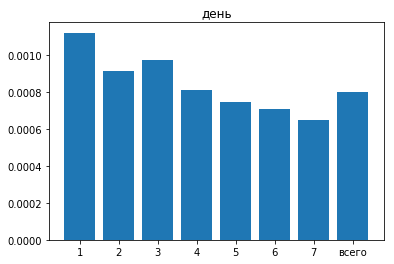

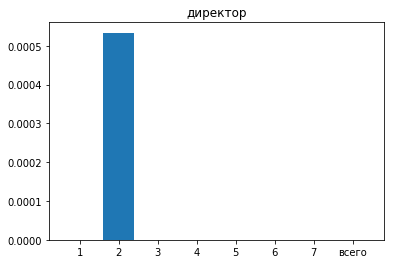

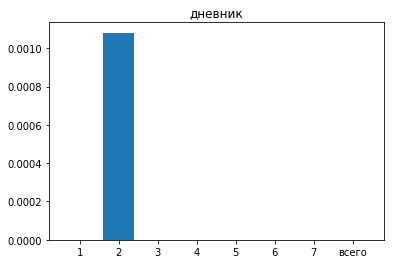

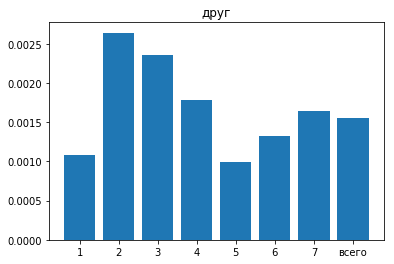

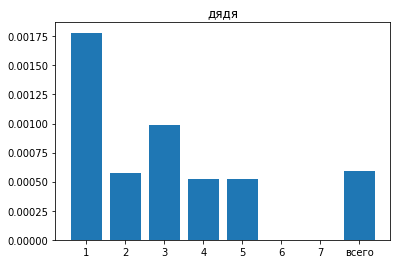

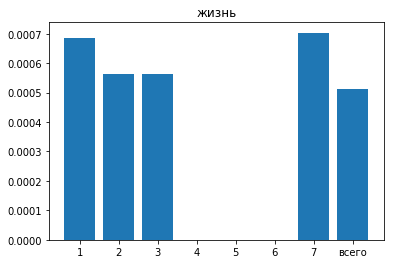

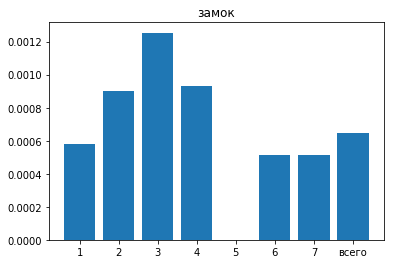

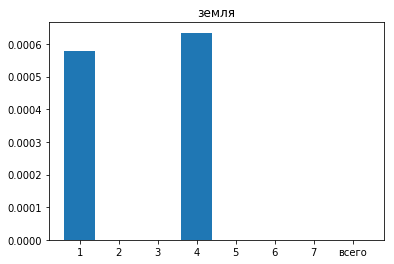

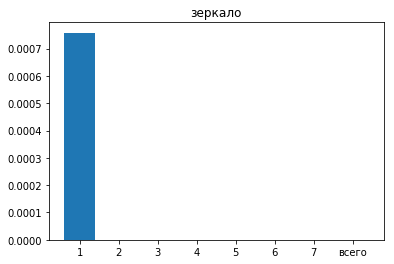

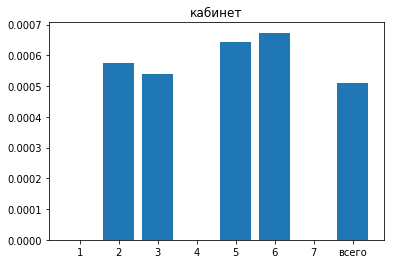

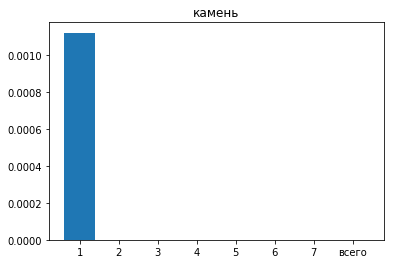

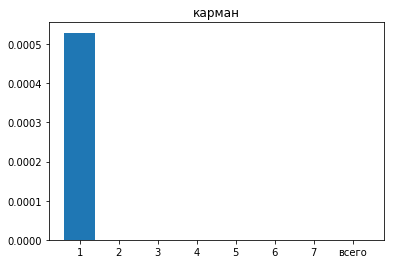

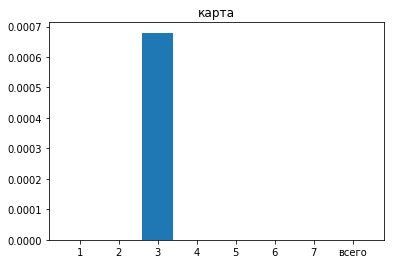

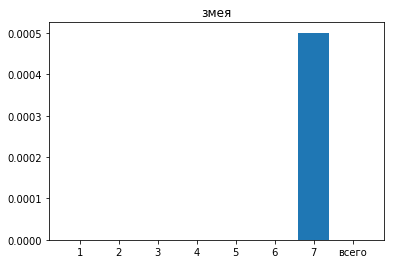

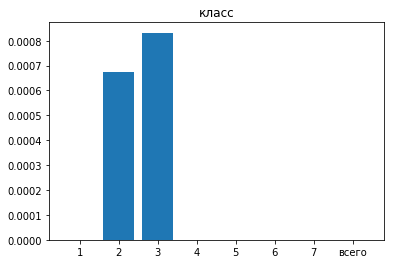

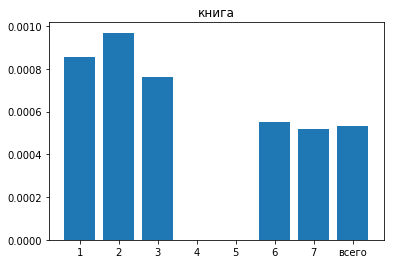

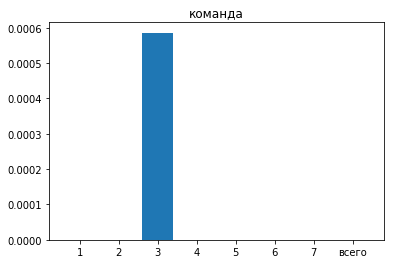

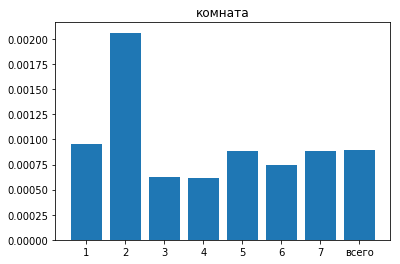

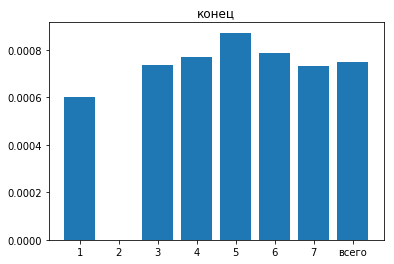

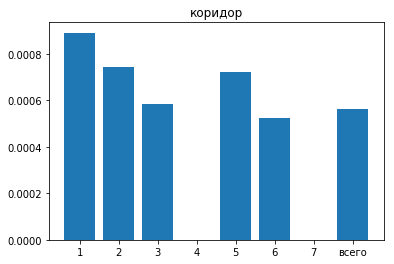

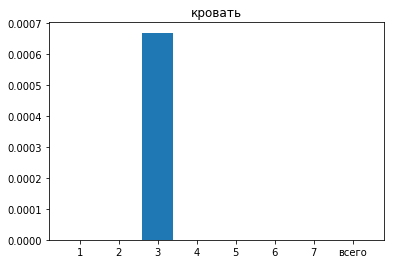

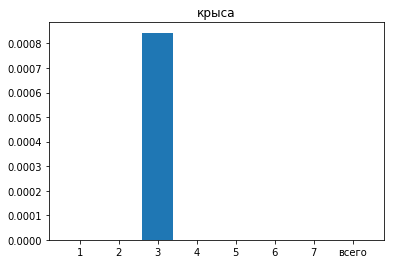

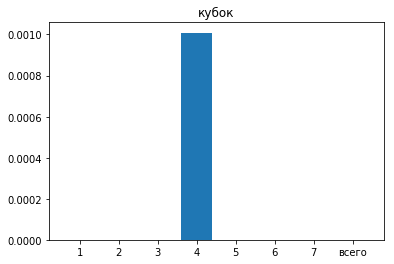

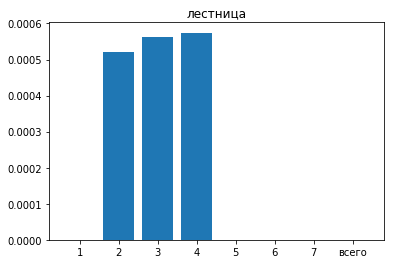

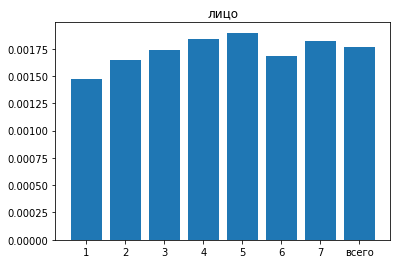

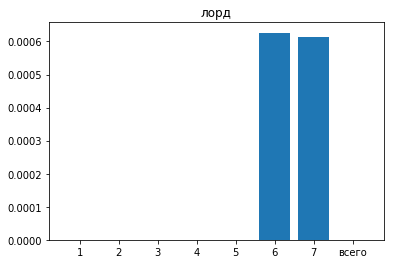

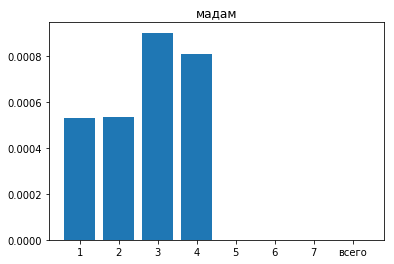

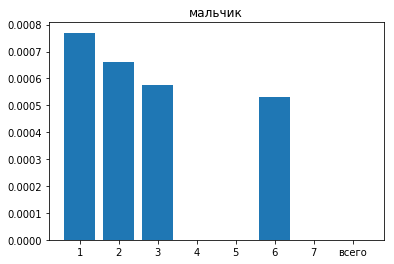

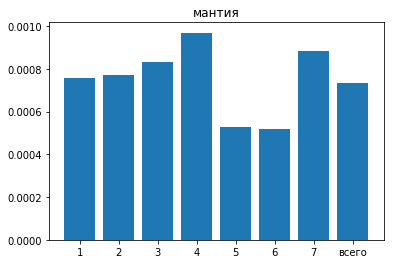

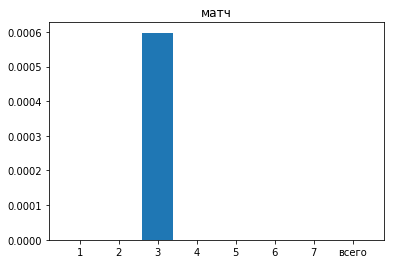

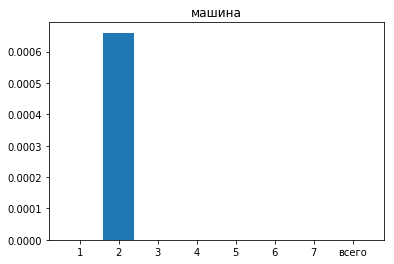

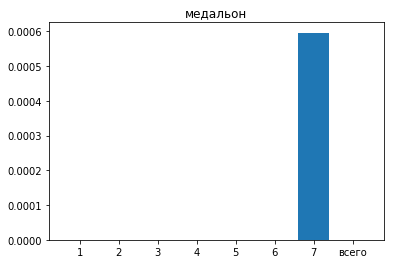

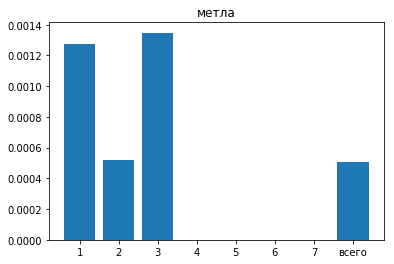

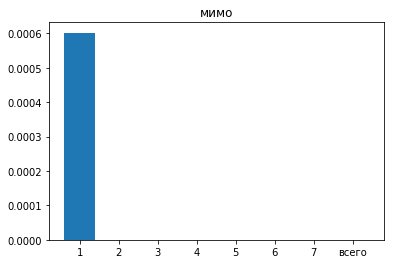

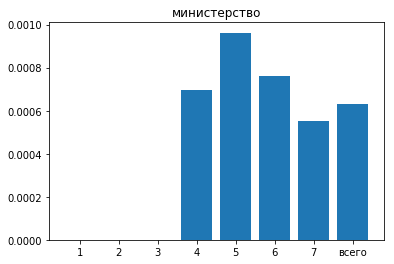

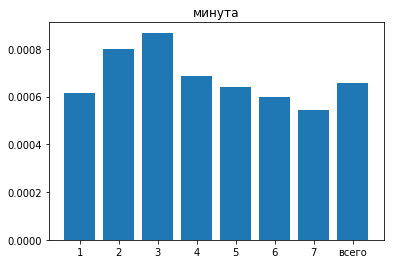

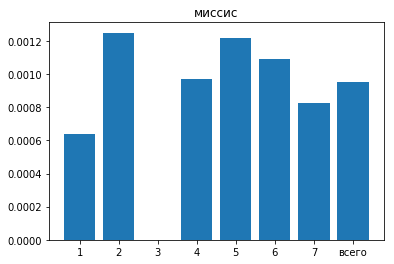

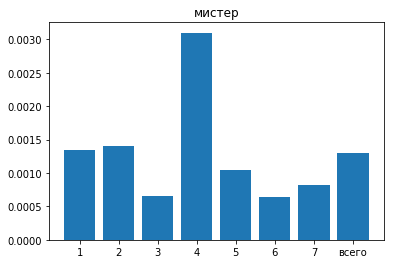

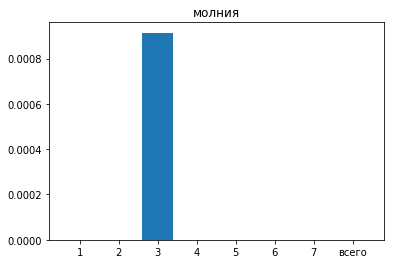

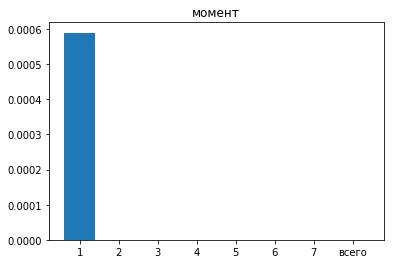

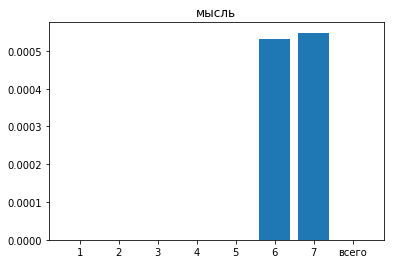

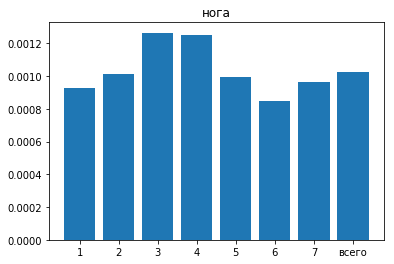

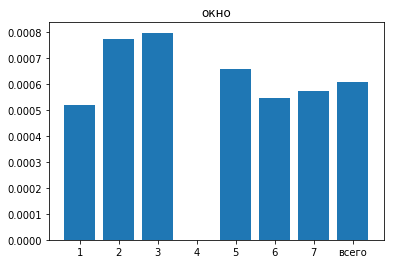

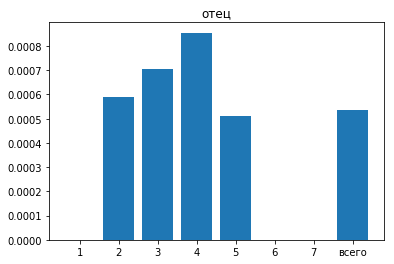

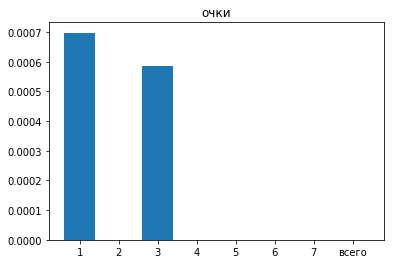

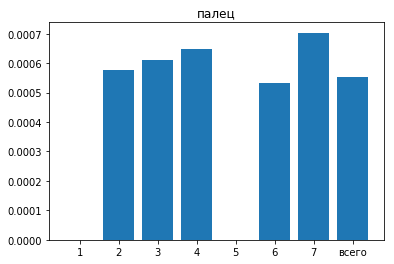

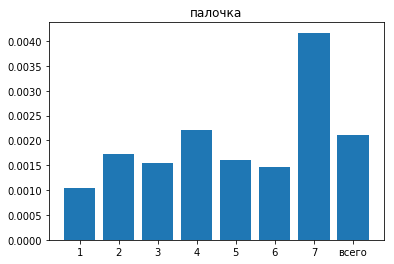

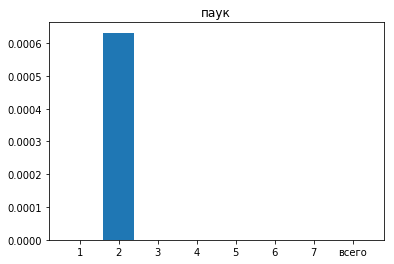

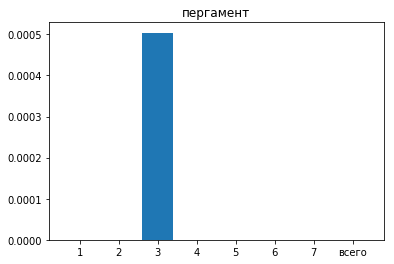

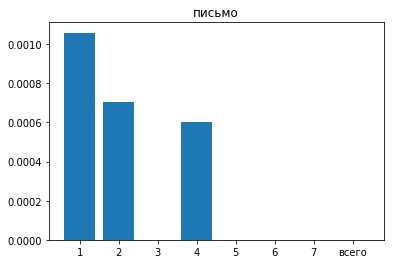

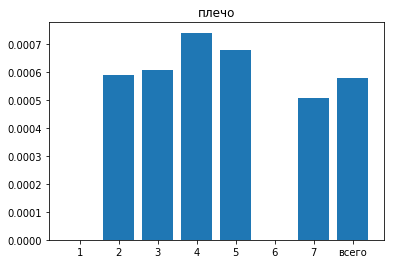

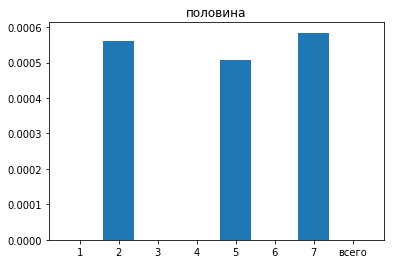

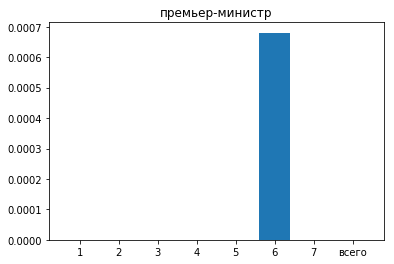

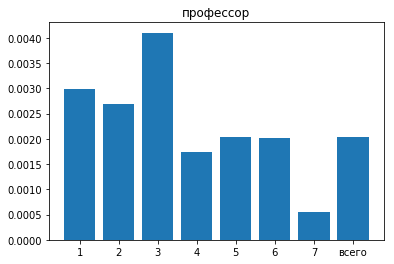

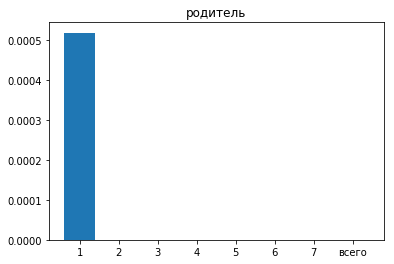

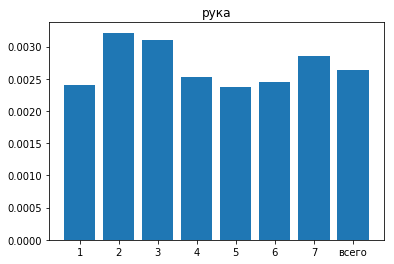

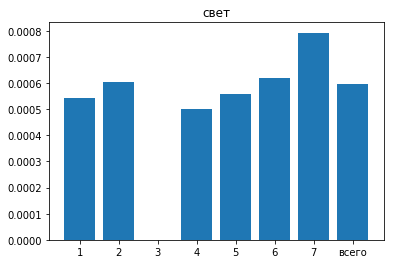

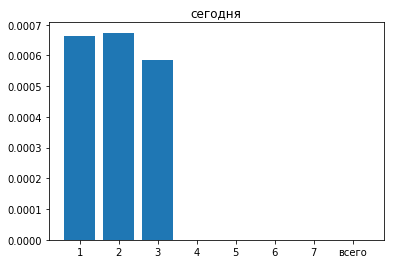

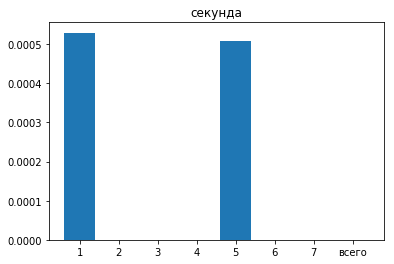

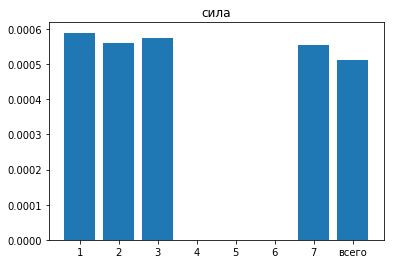

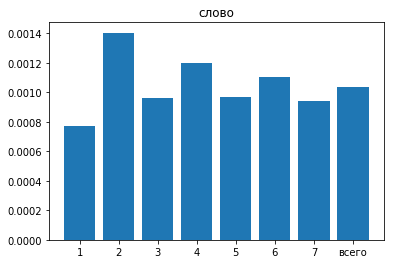

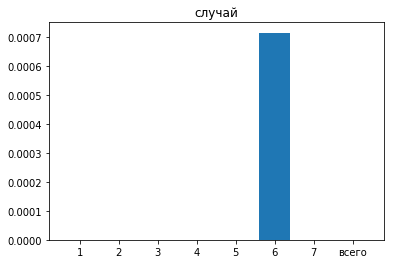

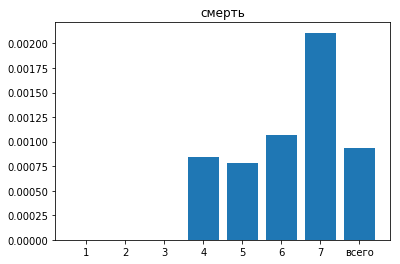

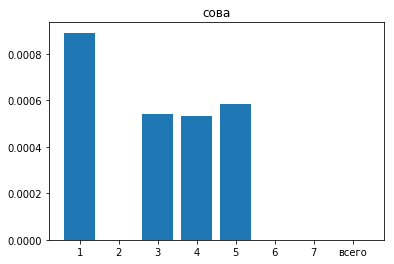

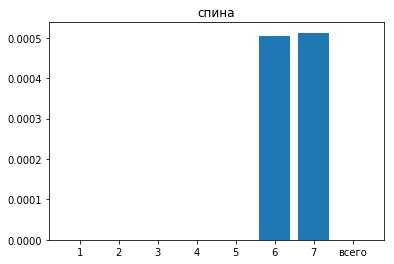

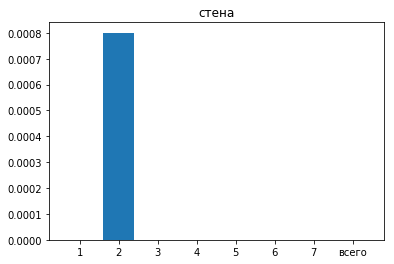

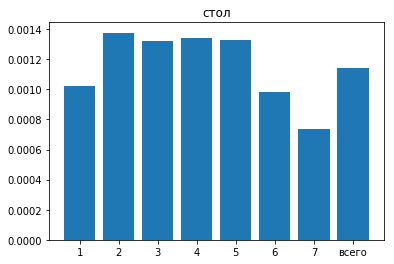

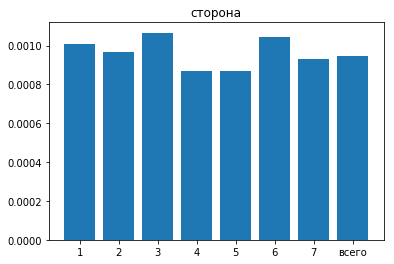

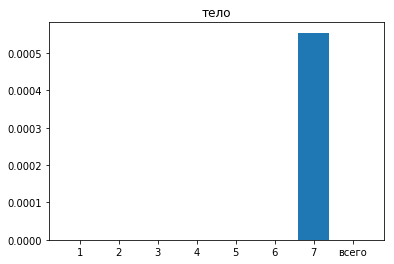

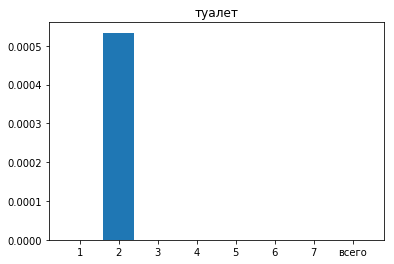

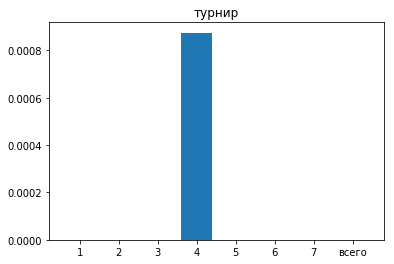

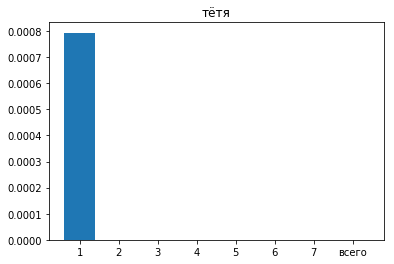

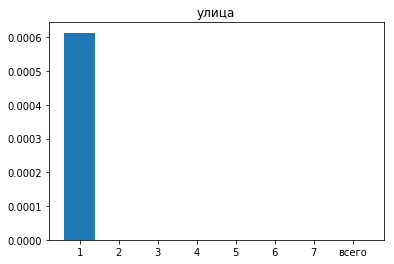

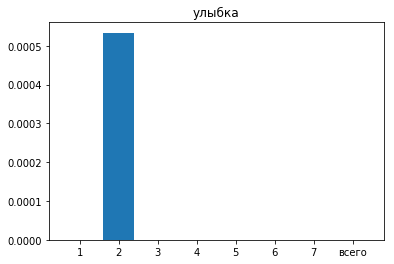

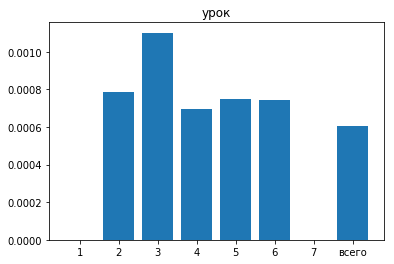

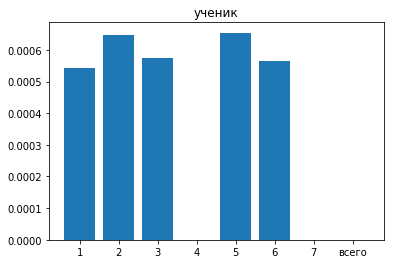

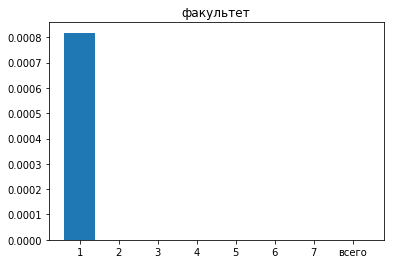

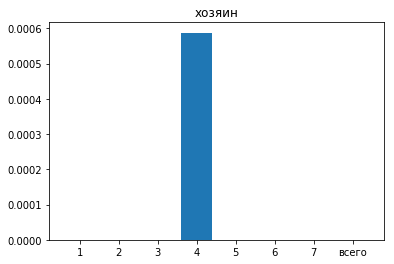

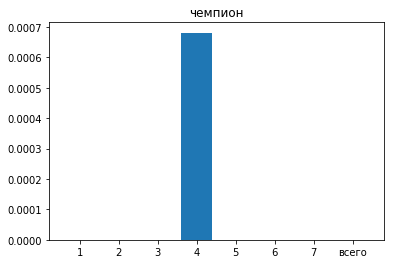

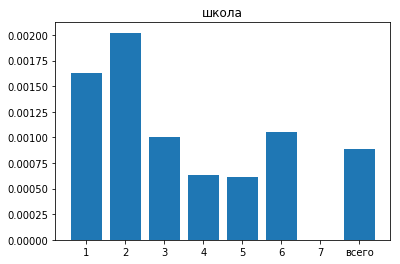

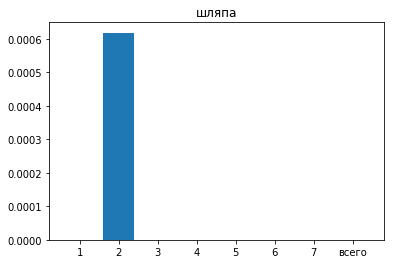

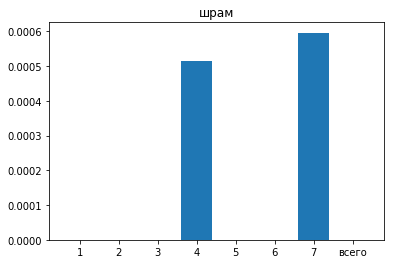

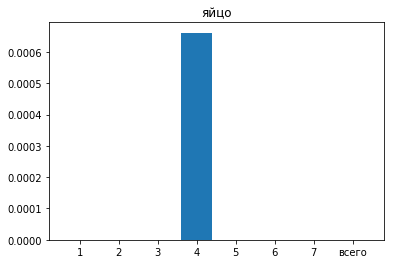

In [27]:
# предметы
for cur_name in items.columns:
    plt.bar(items[cur_name].index, items[cur_name])
    plt.title(cur_name)
    plt.show()

In [ ]:
#Статистика встречаемости разных персонажей в одной книге 

In [ ]:
names_words = ['боль', 'брат', 'вода', 'вопрос', 'директор', 'дневник', 'друг', 'дядя', 'жизнь', 'замок', 'зеркало', 'кабинет', 'камень', 'карман', 'карта', 'змея', 'класс', 'книга', 'команда', 'кровать', 'крыса', 'кубок', 'лестница', 'лорд', 'мадам', 'мальчик', 'матч', 'машина', 'медальон', 'метла', 'министерство', 'молния', 'момент', 'мысль', 'нога', 'окно', 'отец', 'очки', 'палец', 'палочка', 'паук', 'пергамент', 'письмо', 'плечо', 'половина', 'премьер-министр', 'профессор', 'родитель', 'свет', 'сила', 'случай', 'смерть', 'сова', 'спина', 'стена', 'тело', 'туалет', 'турнир', 'тётя', 'улица', 'улыбка', 'урок', 'ученик',  'факультет', 'хозяин', 'чемпион',  'школа', 'шляпа', 'шрам', 'яйцо']

In [ ]:
#предметы
for cur_book in items.columns:
    tmp = items[items[cur_book] > 0.0005].sort_values(cur_book)
    y = len(tmp) * 0.4
    plt.figure(figsize=(10, y))
    plt.barh(tmp.index, tmp[cur_book])
    plt.title(cur_book)
    plt.show()

In [50]:
pers.iloc[i][> 0.1]

SyntaxError: invalid syntax (<ipython-input-50-456ac60fc148>, line 1)

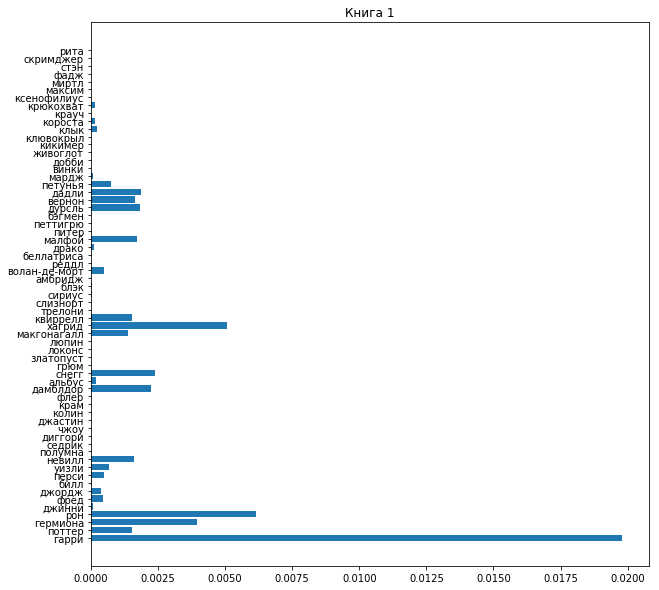

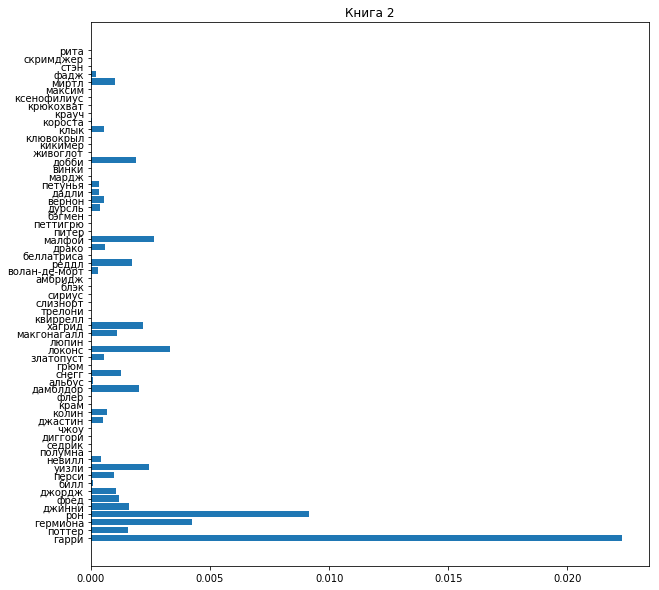

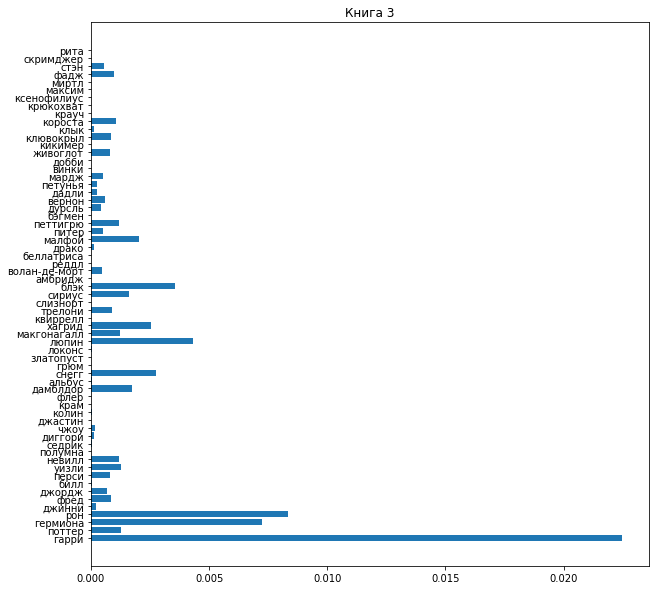

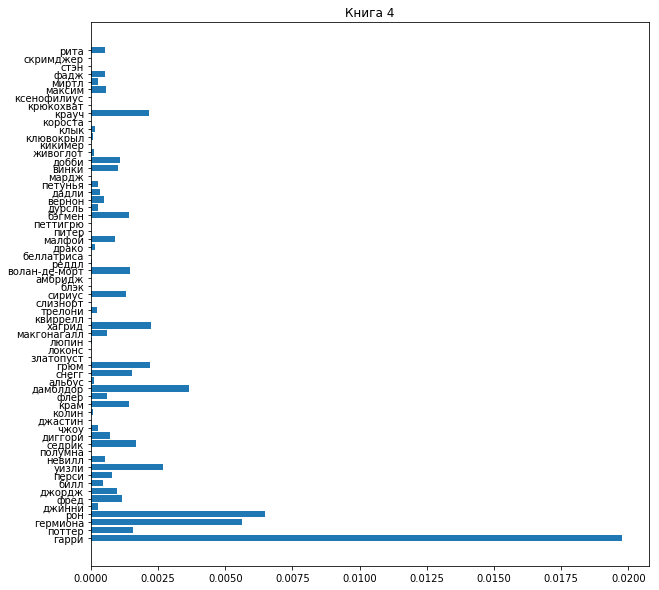

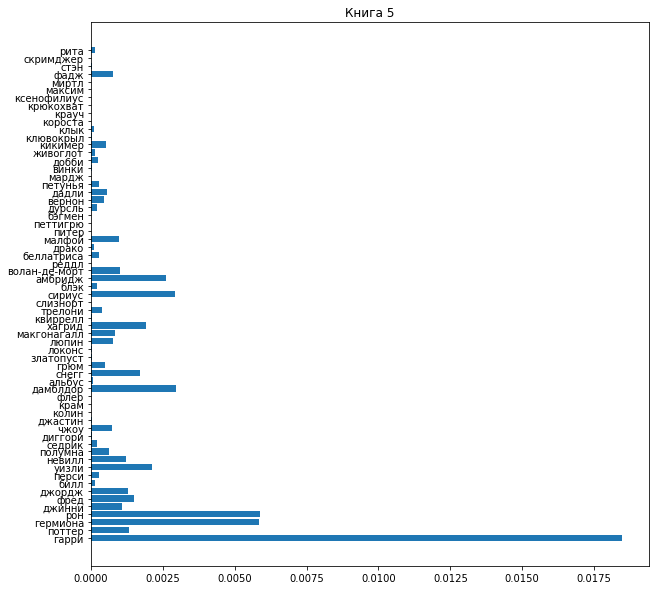

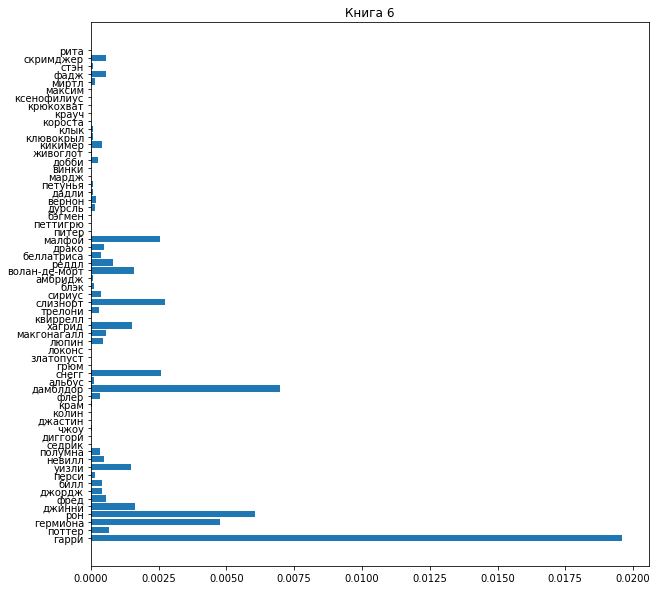

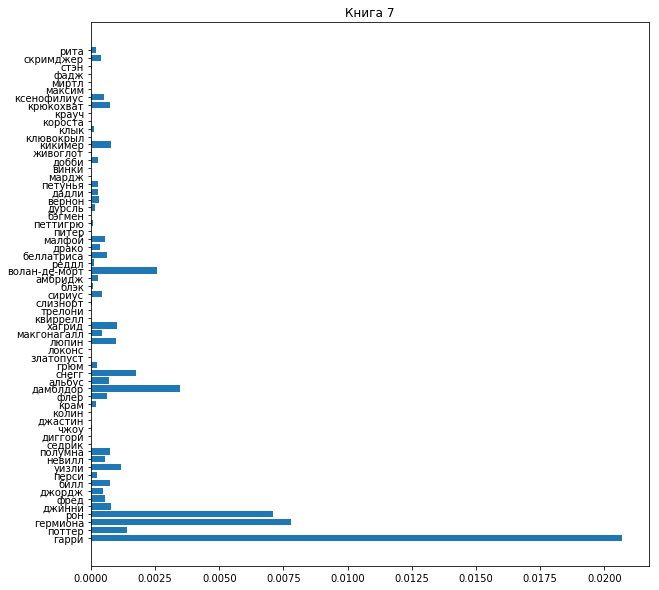

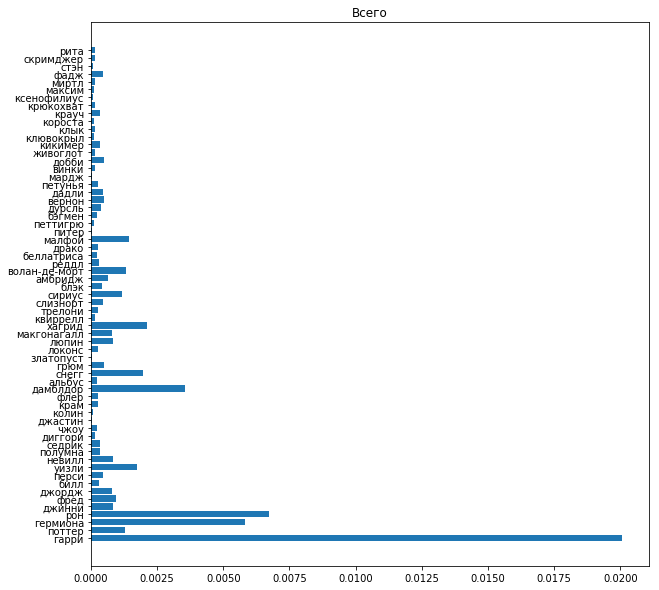

In [48]:
#персонажи
for i in range(len(pers) - 1):
    plt.figure(figsize=(10,10))
    plt.barh(pers.columns, pers.iloc[i])
    plt.title('Книга ' + str(i + 1))
    plt.show()
plt.figure(figsize=(10,10))
plt.barh(pers.columns, pers.iloc[7])
plt.title('Всего')
plt.show()

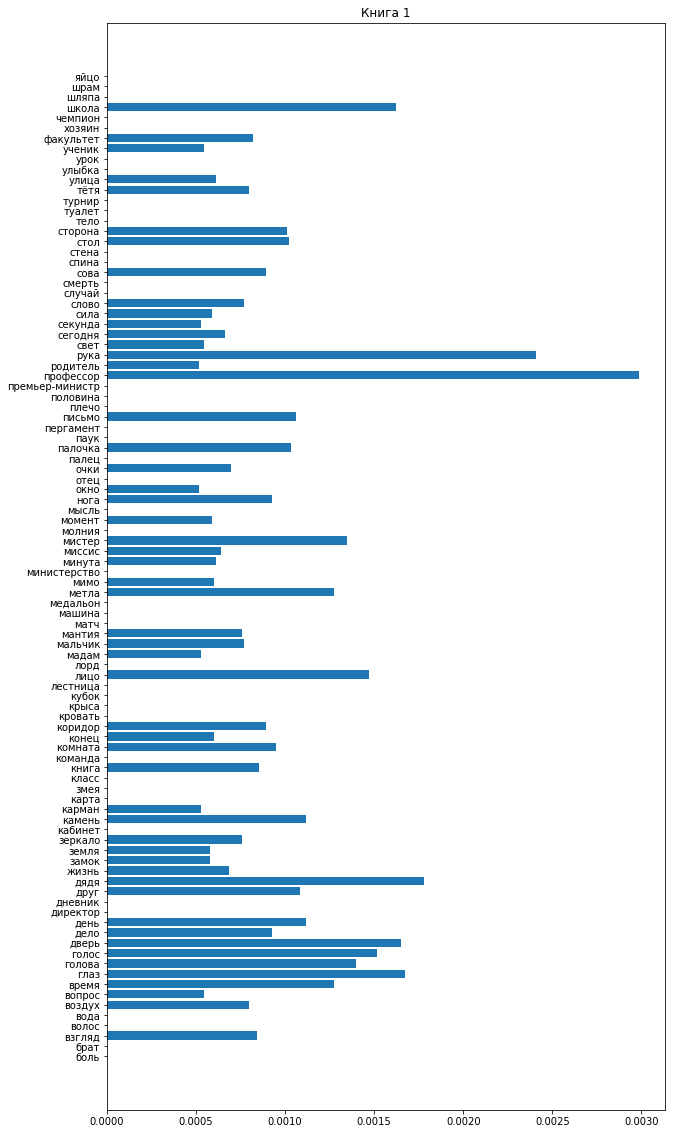

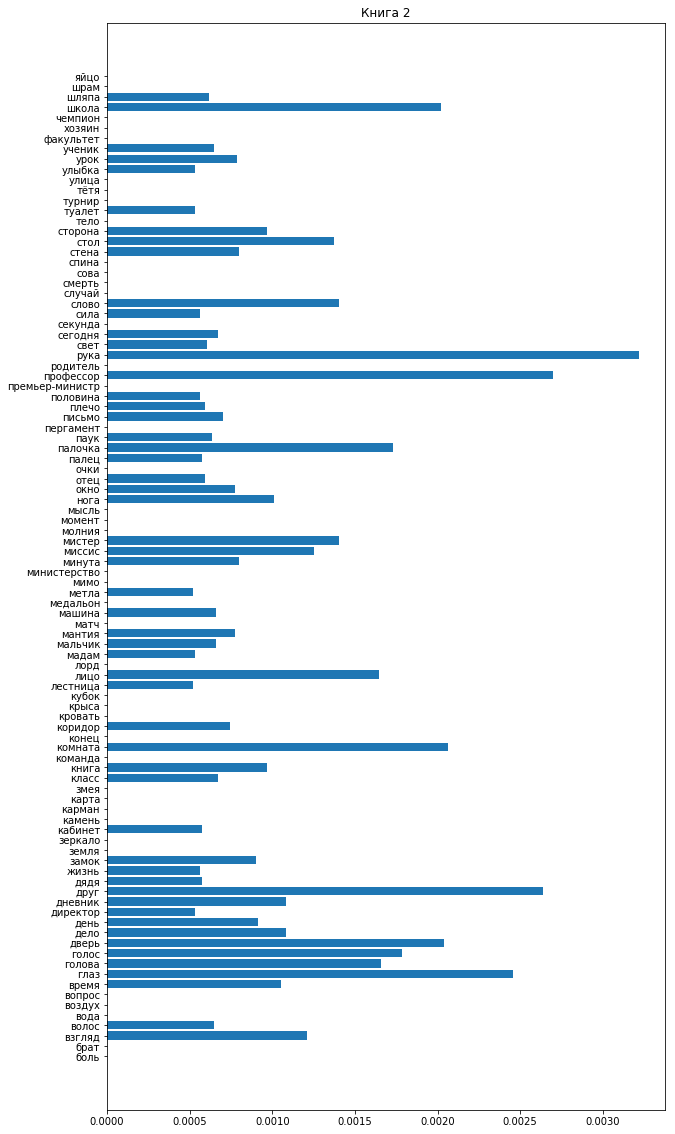

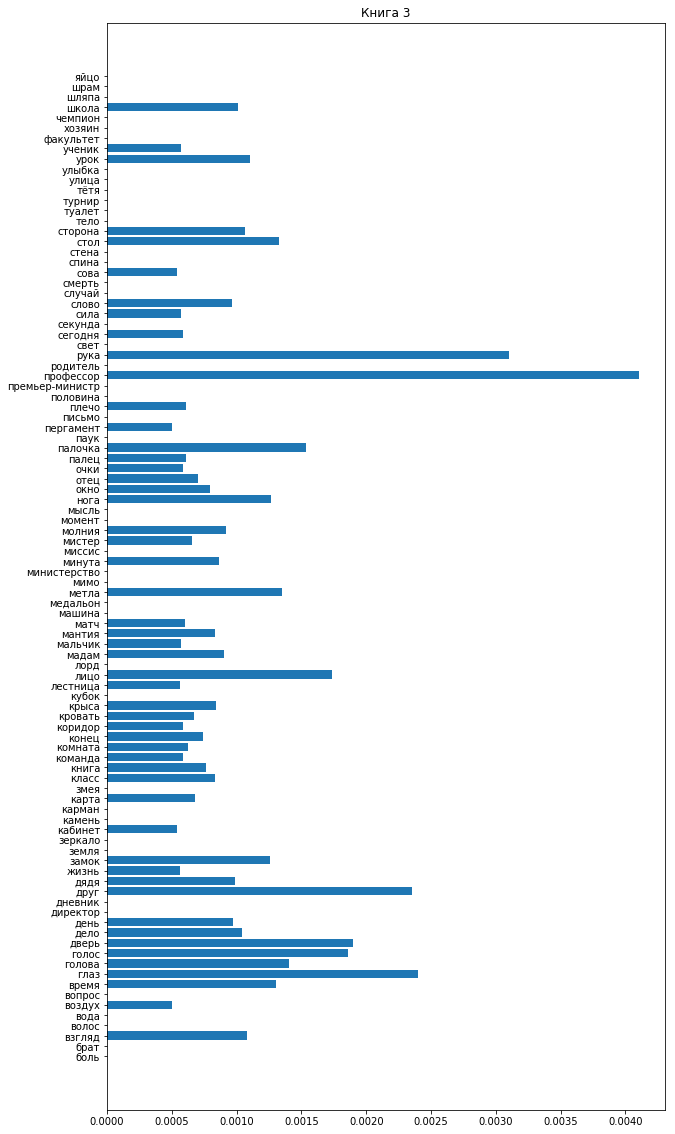

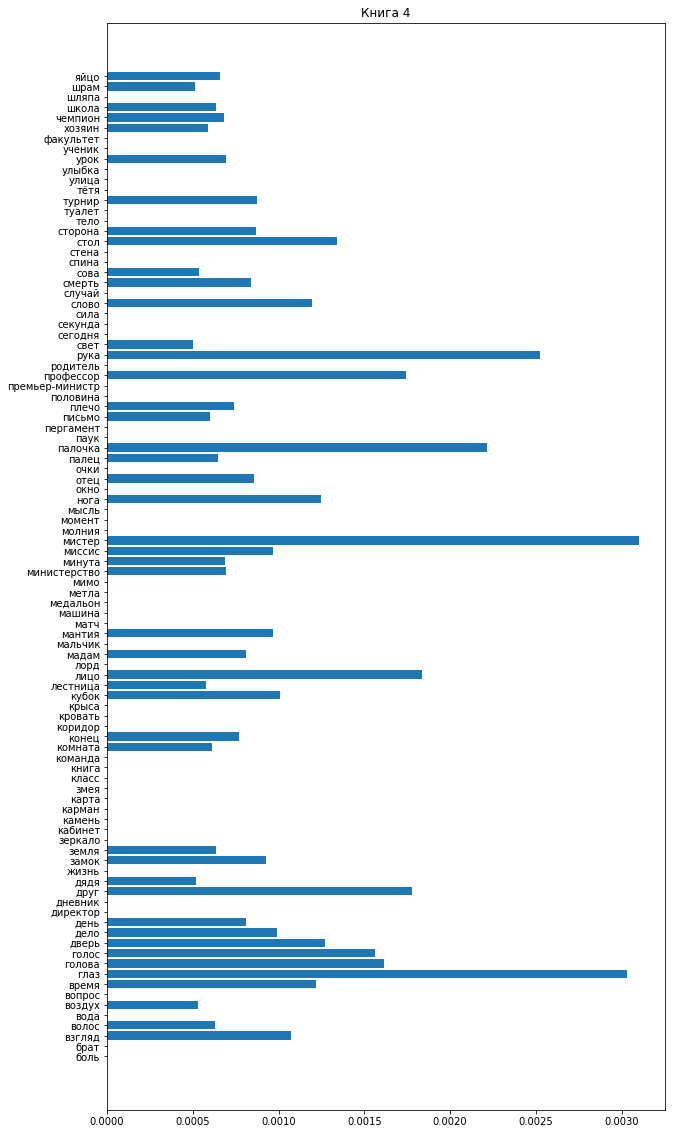

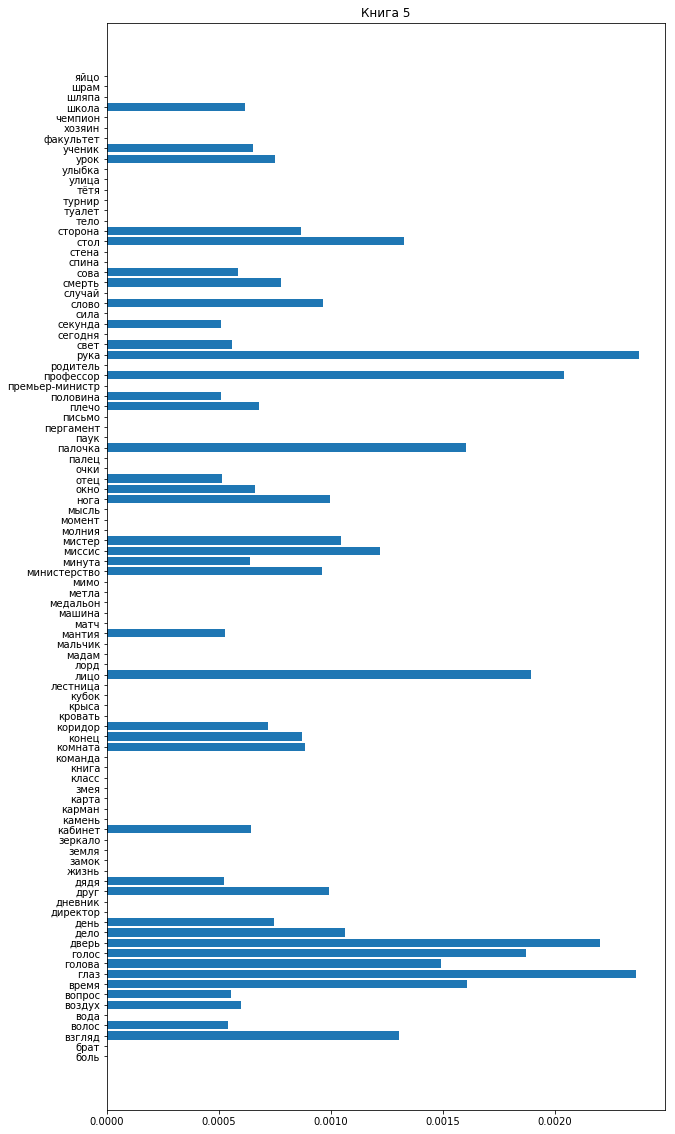

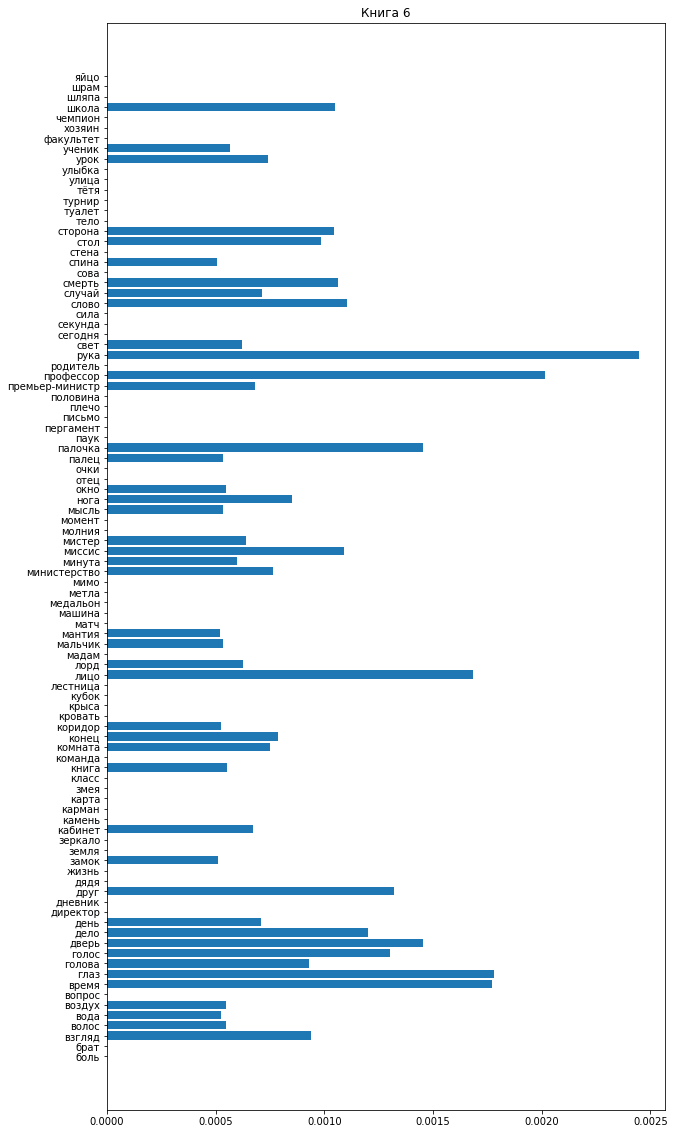

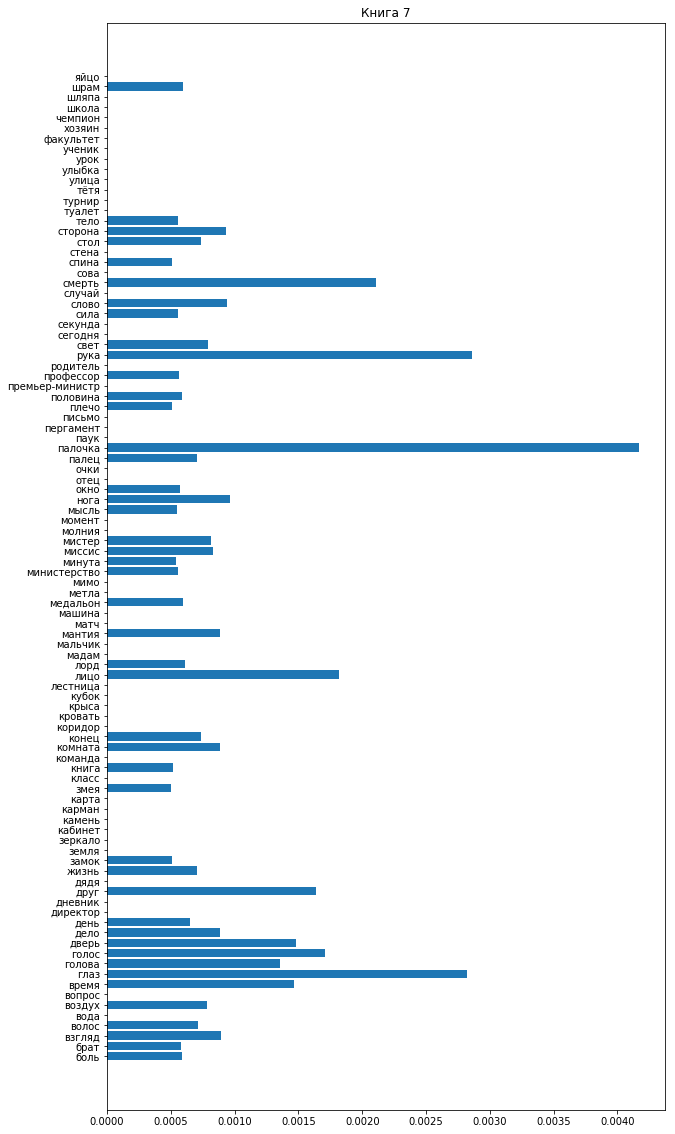

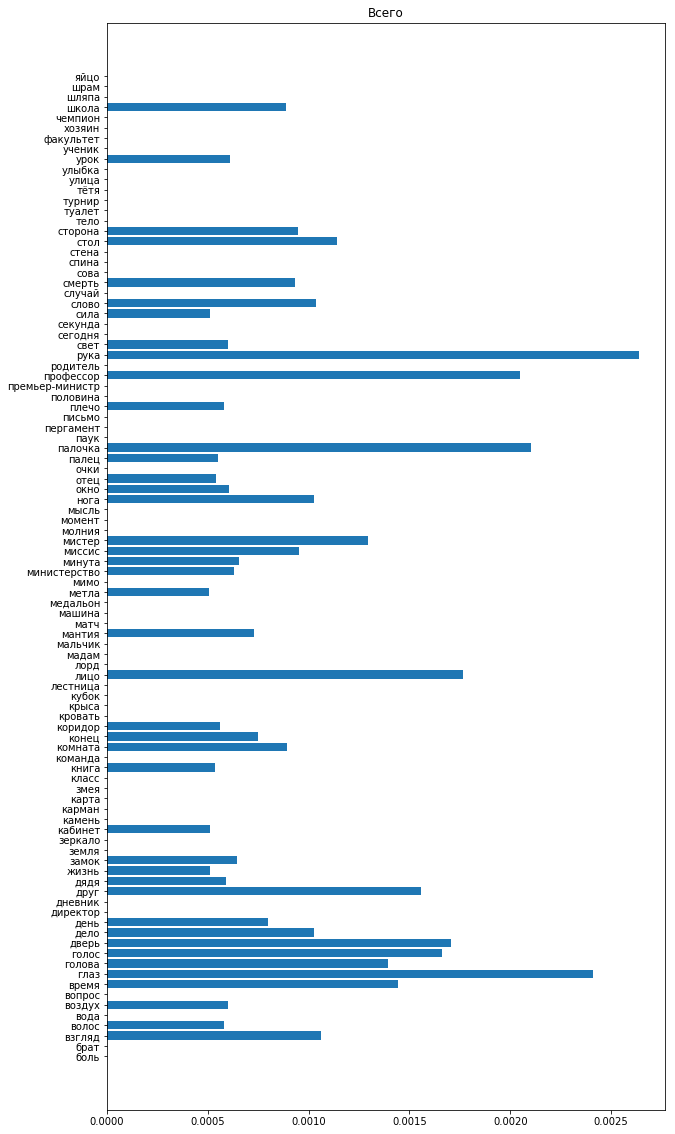

In [30]:
#предметы
for i in range(len(items) - 1):
    plt.figure(figsize=(10,20))
    plt.barh(items.columns, items.iloc[i])
    plt.title('Книга ' + str(i + 1))
    plt.show()
plt.figure(figsize=(10,20))
plt.barh(items.columns, items.iloc[7])
plt.title('Всего')
plt.show()

In [ ]:
# ИДЕЯ - рисовать только слова, которые в статистике предметов есть